# 環境構築



*   Pythonモジュールへのパス追加





In [255]:
!pwd

/mnt/MachineLearning/NoteBook/NumDropletsRoI/TimeMean


In [256]:
# import os

# os.chdir("/mnt/MachineLearning")

In [257]:
import sys
sys.path.append('/mnt/MachineLearning/modules')

In [258]:
%matplotlib inline
import os
import glob
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import interpolate
import show_mod

# 前処理

In [4]:
#読み込むデータのパスの設定

# data_path = './data'
# input_list = glob.glob(data_path+"/*"+"/inputdata.csv")

# input_list

In [5]:
#input(空調条件等)の読み込み
# df_input = None

# for input_fname in input_list:
#     df_read = pd.read_csv(input_fname, index_col="case_name")
#     if df_input is None:
#         df_input = df_read
#     else:
#         df_input = pd.concat([df_input, df_read])

# df_input

In [6]:
#空調条件のみ抽出
# df_meta = df_input.loc[:, ['aircon', 'ventilation', 'exhaust']]

# df_meta

In [7]:
#排気口位置a,b,offをダミー変数化

# df_meta = pd.get_dummies(df_meta, columns=['exhaust'])
# # dummies = pd.get_dummies(df_input['exhaust'])
# # df_input.drop("exhaust", axis=1, inplace=True)
# # df_input = pd.concat([df_input, dummies], axis=1)
# # df_input = df_input.reindex(columns=['aircon','ventilation','exhaust_a','b','off'
# #           ,'1_x','1_y','1_z','1_angle','2_x','2_y','2_z','2_angle','3_x','3_y','3_z','3_angle'
# #           ,'4_x','4_y','4_z','4_angle','5_x','5_y','5_z','5_angle',"office_size_x","office_size_y"
# #           ,"aircon_position_x","aircon_position_y"])

# df_meta

# データ追加（2022/10/26）

- データ数：from 263 to 431
- オフィス数：from 9 to 15 (ID : 1,2,3,4,5,6,7,8,9,10,14,15,16,22,28)

In [8]:
# df_count = pd.read_csv("./CountResults/data_added_221018/sitting/count_from2sec_patientAverage.csv", index_col="casename")
df_count = pd.read_csv("/mnt/MachineLearning/CountResults/data_added_221018/sitting/count_from2sec_patientAverage.csv")
df_count

,casename,num_drop,volume[ml],RoI
0,office2_0_0,6739.4,0.000067,204.224242
1,office2_0_164_aout,7865.4,0.000063,238.345455
2,office2_0_164_bout,6049.8,0.000062,183.327273
3,office2_0_246_aout,7934.4,0.000050,240.436364
4,office2_0_246_bout,7662.0,0.000082,232.181818
...,...,...,...,...
426,office3_960_164_bout,5117.4,0.000075,155.072727
427,office3_960_246_aout,4428.0,0.000073,134.181818
428,office3_960_246_bout,3890.0,0.000066,117.878788
429,office3_960_82_aout,5221.2,0.000072,158.218182


In [9]:
def get_val_from_casename(casename:str, index:int):
    return float(casename.split("_")[index])

print(get_val_from_casename("office2_0_164_aout", 2))

164.0


In [10]:
def get_exhaust_from_casename(casename:str):
    s_split = casename.split("_")
    if len(s_split) == 4:
        exhaust_str = s_split[3]
        if exhaust_str == "aout":
            exhaust = "a"
        elif exhaust_str == "bout":
            exhaust = "b"
    else:
        exhaust = "off"
        
    return exhaust

print(get_exhaust_from_casename("office2_0_164"))

off


In [11]:
# df_count["aircon"] = df_count["casename"].apply(get_val_from_casename, args=(1,))
# df_count["ventilation"] = df_count["casename"].apply(get_val_from_casename, args=(2,))
# df_count["exhaust"] = df_count["casename"].apply(get_exhaust_from_casename)
                                                     
# df_count

In [12]:
# df_summary = df_count

In [13]:
# df_summary.to_csv("/mnt/MachineLearning/data/summary_221015.csv", index=False)

# データ取り込み

In [259]:
df_summary = pd.read_csv("/mnt/MachineLearning/data/summary_20221216.csv")

df_summary

,case_name,office,aircon,ventilation,exhaust,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand
0,office2_0_0,office2,0.0,0.0,off,6739.4,204.224242,902.212978,3665.252246
1,office2_0_164_aout,office2,0.0,164.0,a,7865.4,238.345455,594.272879,3491.917804
2,office2_0_164_bout,office2,0.0,164.0,b,6049.8,183.327273,432.678869,2354.737770
3,office2_0_246_aout,office2,0.0,246.0,a,7934.4,240.436364,326.691514,2902.480532
4,office2_0_246_bout,office2,0.0,246.0,b,7662.0,232.181818,562.535441,2757.177704
...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,office3,960.0,164.0,b,5117.4,155.072727,779.372047,3209.723128
427,office3_960_246_aout,office3,960.0,246.0,a,4428.0,134.181818,1662.486855,3671.024626
428,office3_960_246_bout,office3,960.0,246.0,b,3890.0,117.878788,1343.338436,3968.834276
429,office3_960_82_aout,office3,960.0,82.0,a,5221.2,158.218182,1130.875541,4683.139767


In [260]:
#排気口位置a,b,offをダミー変数化

df_total = pd.get_dummies(df_summary, columns=['exhaust'])
df_total

,case_name,office,aircon,ventilation,n_from2sec,n_from2sec/S,countTimeMean_sit,countTimeMean_sit2stand,exhaust_a,exhaust_b,exhaust_off
0,office2_0_0,office2,0.0,0.0,6739.4,204.224242,902.212978,3665.252246,0,0,1
1,office2_0_164_aout,office2,0.0,164.0,7865.4,238.345455,594.272879,3491.917804,1,0,0
2,office2_0_164_bout,office2,0.0,164.0,6049.8,183.327273,432.678869,2354.737770,0,1,0
3,office2_0_246_aout,office2,0.0,246.0,7934.4,240.436364,326.691514,2902.480532,1,0,0
4,office2_0_246_bout,office2,0.0,246.0,7662.0,232.181818,562.535441,2757.177704,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
426,office3_960_164_bout,office3,960.0,164.0,5117.4,155.072727,779.372047,3209.723128,0,1,0
427,office3_960_246_aout,office3,960.0,246.0,4428.0,134.181818,1662.486855,3671.024626,1,0,0
428,office3_960_246_bout,office3,960.0,246.0,3890.0,117.878788,1343.338436,3968.834276,0,1,0
429,office3_960_82_aout,office3,960.0,82.0,5221.2,158.218182,1130.875541,4683.139767,1,0,0


In [261]:
df_total = df_total.set_index('case_name')

In [262]:
# # df_meta.join(df_count)
# df_total = pd.merge(df_meta, df_count, left_index=True, right_index=True)

# df_total

In [263]:
df_total.std(numeric_only=True)

aircon                     360.876287
ventilation                 83.985694
n_from2sec                 921.844114
n_from2sec/S                36.376848
countTimeMean_sit          219.342164
countTimeMean_sit2stand    758.168789
exhaust_a                    0.495869
exhaust_b                    0.495869
exhaust_off                  0.344132
dtype: float64

In [264]:
from sklearn import preprocessing

#meta(condifion of air)データの標準化
stdscaler = preprocessing.StandardScaler()
df_meta = df_total[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off"]]
stdscaler.fit(df_meta)
df_meta_array = stdscaler.transform(df_meta)

df_meta_standardized = pd.DataFrame(df_meta_array, index=df_total.index, columns=df_meta.columns)
# df_total_standardized = pd.DataFrame(df_total_tf, index=df_total.index, columns=df_total.columns)
df_meta_standardized

# df_input_std = df_input.copy()
# for i in range(int(input_std.shape[1])):
#     df_input_std.iloc[:, i] = input_std[:, i]


,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off
case_name,,,,,
office2_0_0,-1.384552,-1.666952,-0.871311,-0.871311,2.510993
office2_0_164_aout,-1.384552,0.288031,1.147695,-0.871311,-0.398249
office2_0_164_bout,-1.384552,0.288031,-0.871311,1.147695,-0.398249
office2_0_246_aout,-1.384552,1.265523,1.147695,-0.871311,-0.398249
office2_0_246_bout,-1.384552,1.265523,-0.871311,1.147695,-0.398249
...,...,...,...,...,...
office3_960_164_bout,1.278731,0.288031,-0.871311,1.147695,-0.398249
office3_960_246_aout,1.278731,1.265523,1.147695,-0.871311,-0.398249
office3_960_246_bout,1.278731,1.265523,-0.871311,1.147695,-0.398249


In [281]:
df_ml = df_meta_standardized.join(df_total[["office", "n_from2sec/S", "countTimeMean_sit2stand"]])
df_ml

,aircon,ventilation,exhaust_a,exhaust_b,exhaust_off,office,n_from2sec/S,countTimeMean_sit2stand
case_name,,,,,,,,
office2_0_0,-1.384552,-1.666952,-0.871311,-0.871311,2.510993,office2,204.224242,3665.252246
office2_0_164_aout,-1.384552,0.288031,1.147695,-0.871311,-0.398249,office2,238.345455,3491.917804
office2_0_164_bout,-1.384552,0.288031,-0.871311,1.147695,-0.398249,office2,183.327273,2354.737770
office2_0_246_aout,-1.384552,1.265523,1.147695,-0.871311,-0.398249,office2,240.436364,2902.480532
office2_0_246_bout,-1.384552,1.265523,-0.871311,1.147695,-0.398249,office2,232.181818,2757.177704
...,...,...,...,...,...,...,...,...
office3_960_164_bout,1.278731,0.288031,-0.871311,1.147695,-0.398249,office3,155.072727,3209.723128
office3_960_246_aout,1.278731,1.265523,1.147695,-0.871311,-0.398249,office3,134.181818,3671.024626
office3_960_246_bout,1.278731,1.265523,-0.871311,1.147695,-0.398249,office3,117.878788,3968.834276


In [266]:
# import numpy as np
# import pointCloud_sampling as pcs

# # rng = np.random.default_rng()

# #予め点群をサンプリングしておいたものを取得
# sampledPointCloud_dict = pcs.read_sampledPointCloud('/content/drive/MyDrive/ML/PointNetTrial/data/pointCloud_sampled')

# sampledPointCloud_dict

In [267]:
officemodel_path = '/mnt/MachineLearning/Office3DModel/model_origin'
# office_list = os.listdir(officemodel_path)
# case_list = [s.replace('office', 'case') for s in os.listdir(data_path)]
case_list = os.listdir(officemodel_path)
print(case_list)
# office_list = ['office1', 'office2', 'office3', 'office7', 'office10', 'office15', 'office16', 'office22', 'office28']
# print(office_list)

['case1', 'case10', 'case11', 'case12', 'case13', 'case14', 'case15', 'case16', 'case17', 'case18', 'case19', 'case2', 'case20', 'case21', 'case22', 'case23', 'case24', 'case25', 'case26', 'case27', 'case28', 'case29', 'case3', 'case30', 'case31', 'case32', 'case33', 'case4', 'case5', 'case6', 'case7', 'case8', 'case9']


点数memo

- aircon: 580
- airvent: 8
- room: 20
- desks: 1800~1825
- bosy: 約26500

In [ ]:
import os
import random
import numpy as np
import json
import glob
from stl import mesh
from enum import Enum, auto

# 列挙型の定義
class OfficePart(Enum):
    aircon = auto()
    airvent = auto()
    body = auto()
    room = auto()
    desks = auto()


"""
データの前処理

オフィスモデル（STLファイル）を読み込み、点群情報のみ取り出し、
ランダムサンプリングで指定個の点群(ndarray)にする。


aircon: air conditioner
airvent: hole of Air vent
body: body of human
layout: deskd and walls
"""


# 列挙型のメンバーの列挙
for part in OfficePart:
    print(part)
    
NUM_POINTS = 2048

pointCloud_dict = {}
for casename in case_list:
    officename = casename.replace('case', 'office') 
    
    #まずは単純に読み込み、辞書に格納
    pc_dict = {}
    for part in OfficePart:
        path = officemodel_path + '/' + casename + '/' + part.name
        # print(path)
        stl_list = glob.glob(path + "/*.stl")
        # print(stl_list)
        pc_list = []
        for stlfname in stl_list:
            for mesh_read in mesh.Mesh.from_multi_file(stlfname):
                points = mesh_read.points.reshape([-1, 3])
                pc_list.append(points)

        points_concat = np.concatenate(pc_list)
        points_concat = np.unique(points_concat, axis=0)
        pc_dict[part] = points_concat.copy()
                        
            
    """
    ここから都合合わせのため調整
    """
    pc_dict_modified = {}

    pc_dict_modified["aircon"] = pc_dict[OfficePart.aircon]
    pc_dict_modified["airvent"] = pc_dict[OfficePart.airvent]
    
    pc_body = pc_dict[OfficePart.body]
    rand_list = random.sample(range(len(pc_body)), k=2048)
    pc_dict_modified["body"] = pc_body[rand_list, :]
    
    pc_room = pc_dict[OfficePart.room]
    num_sampling_desks = 1024 - len(pc_room)
    print("num_sampling_desks = ", num_sampling_desks)
    pc_desks = pc_dict[OfficePart.desks]
    rand_list = random.sample(range(len(pc_desks)), k=num_sampling_desks)
    pc_sampled_desks = pc_desks[rand_list, :]
    pc_dict_modified["layout"] = np.concatenate([pc_room, pc_sampled_desks])
    
    
    pointCloud_dict[officename] = pc_dict_modified


In [268]:
pcFilePath = '/mnt/MachineLearning/Office3DModel/PointCloud_sampled/PointCloud_dict_test.npy'

In [269]:
# import numpy as np

# np.save(pcFilePath, pointCloud_dict, allow_pickle='TRUE')

In [270]:
import numpy as np

a = np.load(pcFilePath, allow_pickle='TRUE')    # 0-D Array で返ってくる
pointCloud_dict = a.item()
pointCloud_dict

{'office1': array([[2.5     , 2.25    , 2.6     ],
        [2.5     , 2.375   , 2.6     ],
        [2.5     , 2.45    , 2.6     ],
        ...,
        [3.825   , 1.733333, 0.7     ],
        [0.925   , 2.875   , 0.05    ],
        [1.495   , 1.278333, 0.53    ]], dtype=float32),
 'office10': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
        ...,
        [3.9725  , 2.275   , 0.7     ],
        [3.065   , 4.078333, 0.48    ],
        [1.485   , 2.533333, 0.7     ]], dtype=float32),
 'office11': array([[3.       , 2.5      , 2.6      ],
        [3.       , 2.625    , 2.6      ],
        [3.       , 2.7      , 2.6      ],
        ...,
        [3.96     , 4.305    , 0.53     ],
        [3.45     , 3.183333 , 0.75     ],
        [2.7      , 5.1      , 0.2833333]], dtype=float32),
 'office12': array([[3.      , 2.5     , 2.6     ],
        [3.      , 2.625   , 2.6     ],
        [3.      , 2.7     , 2.6     ],
     

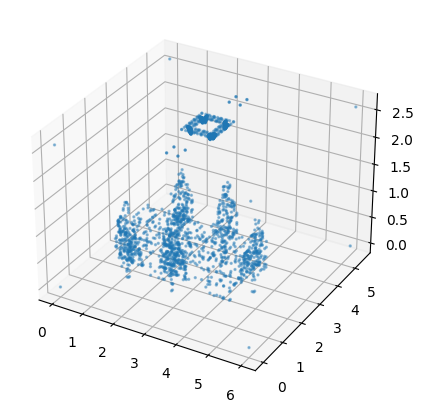

In [272]:
from matplotlib import pyplot as plt

def plot3d_points(point_cloud):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection="3d")
    ax.scatter(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], alpha=0.4, s=2)
    # ax.set_axis_off()
    plt.show()
    
plot3d_points(pointCloud_dict['office1'])

In [17]:
# import numpy as np
# '''
# 点群シャッフルによるデータ増強
# よく考えると無意味だと思う
# '''
# rng = np.random.default_rng()

# pointCloud_augumented_dict = {}
# for office_name, pointCloud in sampledPointCloud_dict.items():
#     pc_list = []
#     for i in range(4):
#         pc = pointCloud.copy()

#         if i >= 1:
#             #点群のシャッフル
#             rng.shuffle(pc)

#         pc_list.append(pc)

#     pointCloud_augumented_dict[office_name] = pc_list

# pointCloud_augumented_dict

In [18]:
# plot3d_points(pointCloud_augumented_dict['office10'][0])
# plot3d_points(pointCloud_augumented_dict['office10'][1])
# plot3d_points(pointCloud_augumented_dict['office10'][2])
# plot3d_points(pointCloud_augumented_dict['office10'][3])

In [19]:
# def get_augumented_dataset():
#     '''
#     点群データ増強に合わせて、メタデータや感染リスク分布のデータも複製して増やす
#     '''
#     case_index_list = list(df_total.index)
#     # case_index_list = list(df_total["casename"])


#     case_index_augumented_list = []

#     pointCloudArray_list = []
#     metaArray_list = []

#     RoI_list = []

#     for case_index in case_index_list:
#         office_name = case_index.split('_', maxsplit=1)[0]
#         pc_list = pointCloud_augumented_dict[office_name]
#         for augumentID, pointCloud in enumerate(pc_list):
#             case_index_augumented_list.append(case_index + '-' + str(augumentID))
#             pointCloudArray_list.append(pointCloud)
#             metaArray_list.append(df_meta_standardized.loc[case_index])
#             # RoI_list.append(df_total["RoI"].loc[case_index])
#             RoI_list.append(df_total["count_timeMean"].loc[case_index])

#     case_index_array = np.array(case_index_augumented_list)
#     metaArray = np.array(metaArray_list)
#     RoIArray = np.array(RoI_list)

#     pointCloudArray = np.array(pointCloudArray_list)
    
#     return case_index_array, pointCloudArray, metaArray, RoIArray

# X_index, X_pc, X_meta, y = get_augumented_dataset()

In [276]:
# def get_officeDataset(officename_list:list, df_core:pd.DataFrame, pointCloud_dict:dict, shuffle:bool):
#     """
#     Return a certain office Dataset.
#     You can specify List of offices.
#     """
    
#     df_main = pd.DataFrame()
    
#     for officename in officename_list:
#         df = df_core[ df_core["office"]==officename ]
#         df_main = pd.concat([df_main, df])
        
#     if shuffle:
#         df_main = df_main.sample(frac=1, random_state=0)
        
#     # meke Dictionary of pointCloudList in order of MainDataFrame
#     pc_list_dict = {"aircon":[], "airvent":[], "body":[], "layout":[], }
#     for officename in df_main["office"]:
#         for key, pc_list in pc_list_dict.items():
#             pc_list.append(pointCloud_dict[officename][key])
            
#     # make input-Dictionary and to ND-Array
#     input_dict = {"meta":df_main[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off", ]]}
#     for key, pc in pc_list_dict.items():
#         input_dict[f"pointCloud_{key}"] = np.array(pc)
                
#     return input_dict, df_main["countTimeMean_sit2stand"]
        

In [330]:
def get_officeDataset(officename_list:list, df_core:pd.DataFrame, pointCloud_dict:dict, shuffle:bool, standardize_pointCloud=True):
    """
    Return a certain office Dataset.
    You can specify List of offices.
    """
    
    df_main = pd.DataFrame()
    
    for officename in officename_list:
        df = df_core[ df_core["office"]==officename ]
        df_main = pd.concat([df_main, df])
        
    if shuffle:
        df_main = df_main.sample(frac=1, random_state=0)
        
    # meke Dictionary of pointCloudList in order of MainDataFrame
    pc_list = []
    for officename in df_main["office"]:
        pc_list.append(pointCloud_dict[officename])
        
    pc_array = np.array(pc_list)
    
    if standardize_pointCloud:
        pc_array = ( pc_array - pc_array.mean() ) / pc_array.std()
            
    # make input-Dictionary and to ND-Array
    input_dict = {
        "meta":df_main[["aircon", "ventilation", "exhaust_a", "exhaust_b", "exhaust_off", ]],
        "pointCloud":pc_array,
    }
                
    # return input_dict, df_main["countTimeMean_sit2stand"]
    return input_dict, df_main["n_from2sec/S"]
        

In [289]:
X_dict_sample, y_sample = get_officeDataset(
    ["office1", "office2"],
    df_ml, pointCloud_dict,
    standardize_pointCloud=True,
    shuffle=True
)

In [290]:
X_dict_sample

{'meta':                         aircon  ventilation  exhaust_a  exhaust_b  exhaust_off
 case_name                                                                     
 office1_960_123_aout  1.278731    -0.200715   1.147695  -0.871311    -0.398249
 office2_660_246_aout  0.446455     1.265523   1.147695  -0.871311    -0.398249
 office1_960_41_aout   1.278731    -1.178206   1.147695  -0.871311    -0.398249
 office1_960_246_aout  1.278731     1.265523   1.147695  -0.871311    -0.398249
 office1_960_205_aout  1.278731     0.776777   1.147695  -0.871311    -0.398249
 ...                        ...          ...        ...        ...          ...
 office2_660_82_bout   0.446455    -0.689460  -0.871311   1.147695    -0.398249
 office1_0_164_aout   -1.384552     0.288031   1.147695  -0.871311    -0.398249
 office2_960_246_bout  1.278731     1.265523  -0.871311   1.147695    -0.398249
 office2_360_164_aout -0.385821     0.288031   1.147695  -0.871311    -0.398249
 office2_0_82_aout    -1.384552 

In [291]:
y_sample

case_name
office1_960_123_aout    217.715152
office2_660_246_aout    236.830303
office1_960_41_aout     163.496970
office1_960_246_aout    196.054545
office1_960_205_aout    176.884848
                           ...    
office2_660_82_bout     202.824242
office1_0_164_aout      219.690909
office2_960_246_bout    224.381818
office2_360_164_aout    201.745455
office2_0_82_aout       218.945455
Name: n_from2sec/S, Length: 67, dtype: float64

In [153]:
# def get_dataset(df_main, df_meta):
#     '''
#     説明変数と目的変数をNDArrayに変換する
#     '''
    
#     pc_aircon_list = []
#     pc_airvent_list = []
#     pc_body_list = []
#     pc_layout_list = []
    
#     metaArray_list = []

#     RoI_list = []

#     for index, row in df_total.iterrows():
#         office_name = row["office"]
#         pc_aircon_list.append(pointCloud_dict[office_name]["aircon"])
#         pc_airvent_list.append(pointCloud_dict[office_name]["airvent"])
#         pc_body_list.append(pointCloud_dict[office_name]["body"])
#         pc_layout_list.append(pointCloud_dict[office_name]["layout"])
        
#         metaArray_list.append(df_meta_standardized.loc[index])
            
#         RoI_list.append(df_main["countTimeMean_sit2stand"].loc[index])
#         # RoI_list.append(df_main["count_timeMean"].loc[case_index])

#     officename_array = df_total["office"].to_numpy()
#     metaArray = np.array(metaArray_list)
#     RoIArray = np.array(RoI_list)

#     pc_aircon_array = np.array(pc_aircon_list)
#     pc_airvent_array = np.array(pc_airvent_list)
#     pc_body_array = np.array(pc_body_list)
#     pc_layout_array = np.array(pc_layout_list)
    
#     pc_array_dict = {"aircon":pc_aircon_array, "airvent":pc_airvent_array, "body":pc_body_array, "layout":pc_layout_array}
    
#     return officename_array, pc_array_dict, metaArray, RoIArray.reshape(-1,1)


In [156]:
# X_officename, X_pc_dict, X_meta, y = get_dataset(df_total, df_meta)

# # print(X_pc.max())
# # X_pc /= X_pc.max() #Normalization
# # print(X_pc.max())

# for key, X_pc in X_pc_dict.items():
#     #Standardization
#     X_pc_dict[key] = ( X_pc - X_pc.mean() ) / X_pc.std()
    
    
# # l_mul = map(lambda X_pc: ( X_pc - X_pc.std() ) / X_pc.std(), X_pc_list)
# # # print(list(l_mul))

# # X_pc_airvent.std()

In [292]:
import sys

def standardization_test(X:np.ndarray):
    """
    標準化されているかをテスト
    """
    threshold = 1.e-5
    
    if abs(X.mean()) > threshold:
        sys.stderr.write(f'StandardizationError: mean= {X.mean()}\n')
        
    if abs(X.std() - 1.) > threshold:
        sys.stderr.write(f'StandardizationError: std= {X.std()}')
        

In [297]:
# print(X_officename.shape)


print("=============pointClouds=============")
for key, X in X_dict_sample.items():
    if type(X) == pd.DataFrame:
        X = X.values
    standardization_test(X)
    print(key)
    print(X.shape, X.mean(), X.var())
print("=====================================")
    
# print(X_meta.shape, X_meta.mean(), X_meta.var())

# print(y.shape, y.mean(), y.var())

=============pointClouds=============
meta
(67, 5) -0.003001763007137561 0.9755581054087451
pointCloud
(67, 2048, 3) 1.7955529e-07 1.0000001


StandardizationError: mean= -0.003001763007137561
StandardizationError: std= 0.9877034501350823

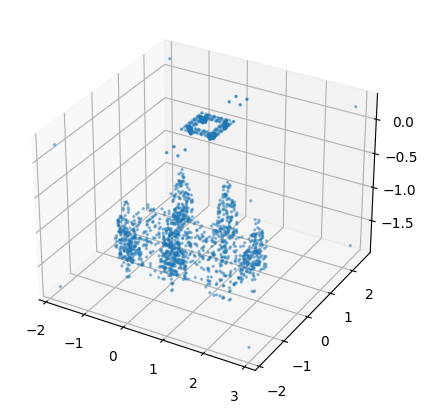

In [302]:
plot3d_points(X_dict_sample["pointCloud"][0, :,:])

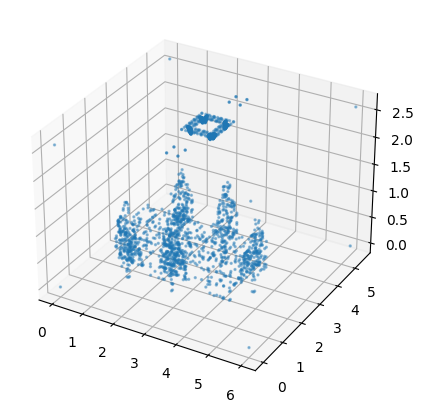

In [304]:
plot3d_points(pointCloud_dict["office1"])

# チューニング

In [313]:
# office_list = list(df_total["office"].unique())
office_list = ["office1", "office2", "office3", "office4", "office5", "office6", ]

office_list

['office1', 'office2', 'office3', 'office4', 'office5', 'office6']

In [315]:
# test_office_list = ["office1", "office7", "office10", "office16", "office22", "office28", ]
test_office_list = office_list

test_office_list

['office1', 'office2', 'office3', 'office4', 'office5', 'office6']

In [307]:
from tensorflow.python.client import device_lib; print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2869632275880876470
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9985785856
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11413361004458141964
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2022-12-21 01:20:17.511667: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1553] Created device /device:GPU:0 with 9523 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:06:00.0, compute capability: 8.6


In [165]:
# def conv_bn(x, filters):
#     x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
#     x = layers.BatchNormalization(momentum=0.0)(x)
#     return layers.Activation("relu")(x)


In [309]:
from tensorflow import keras
import PointNet

def myPointNet(trial, input_pointCloud:keras.Input, suffix:str=None):
    
    if suffix is None:
        hp_conv_layers_name = 'conv_layers'
    else:
        hp_conv_layers_name = f'conv_layers_{suffix}'
        
    hp_conv_layers = trial.suggest_int(hp_conv_layers_name, 1, 3, step=1)
    
    x = input_pointCloud
    for i in range(hp_conv_layers):
        hp_filters = trial.suggest_int(f'filters_{suffix}-{i}', 32, 256, step=32)
        
        x = PointNet.conv_bn(x, hp_filters)
        
#         x = keras.layers.Conv1D(hp_filters, kernel_size=1, padding="valid")(x)
#         x = keras.layers.BatchNormalization(momentum=0.99)(x)       
#         x = keras.layers.ReLU()(x)
    
    return keras.layers.GlobalMaxPooling1D()(x)

In [324]:
from PointNet import conv_bn
from tensorflow import keras

db_path = '/mnt/MachineLearning/OptunaLog/office1to6.db'


def total_model_builder(trial):
    """
    感染リスク分布予測モデル

    順序不変性モデルに、メタデータ（空調条件）を合流させ、MLPで感染リスク予測

    KerasTunerから呼び出され、ハイパーパラメータをチューニングする
    """
    
    input_list = []
    features_list = []
    for key, value in X_dict_sample.items():
        if key == "meta":
            # MetaData
            input_meta = keras.Input(shape=(len(value.columns), ), name='meta')
            
            # append metaData to input_list
            input_list.append(input_meta)

            # append metaData to features_list
            features_list.append(input_meta)
            
        elif key == "pointCloud":
            # PointCloud
            input_pc = keras.Input(shape=(value.shape[1], 3), name=key)

            # append pointClouds to input_list
            input_list.append(input_pc)

            # append feturesOfPointClouds to features_list
            features_list.append(myPointNet(trial, input_pointCloud=input_pc))
        
    
    x = keras.layers.Concatenate()(features_list)
    
    hp_dense_layers = trial.suggest_int('dense_layers', 0, 4, step=1)
    if hp_dense_layers > 0:
        hp_activation = trial.suggest_categorical('activation', ["ReLU", "LeakyReLU", "ELU"])
        hp_dropout = trial.suggest_categorical('dropout', [None, 0.3, 0.5])
    
    for i in range(hp_dense_layers):
        hp_units = trial.suggest_int(f'units-{i}', 64, 512, step=64)
        x = keras.layers.Dense(hp_units)(x)
        
        if hp_activation == "ReLU":
            x = keras.layers.ReLU()(x)
        elif hp_activation == "LeakyReLU":
            x = keras.layers.LeakyReLU()(x)
        elif hp_activation == "ELU":
            x = keras.layers.ELU()(x)
            
        if hp_dropout is not None:
            x = keras.layers.Dropout(hp_dropout)(x)

    outputs = keras.layers.Dense(1)(x)

#     hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
    hp_learning_rate = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    model = keras.Model(inputs=input_list, outputs=outputs, name="predictionnet")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
#         optimizer=keras.optimizers.RMSprop(learning_rate=hp_learning_rate),
        loss='mse',
        metrics=['mae']
        )

    return model


from tensorflow.keras.callbacks import EarlyStopping
import optuna
from keras.backend import clear_session

# 1. Define an objective function to be maximized.
# def objective(trial, X_dict_train, y_train, X_dict_val, y_val):
def objective(trial, fit_office_list, val_office_list):
    # Clear clutter from previous Keras session graphs.
    clear_session()
    
    mse_max_list = []
    for val_office in val_office_list:
        
        train_office_list = [office for office in fit_office_list if office != val_office]
    
        X_dict_train, y_train = get_officeDataset(train_office_list, 
                                                  df_ml, pointCloud_dict, standardize_pointCloud=True, shuffle=True)
        X_dict_val, y_val = get_officeDataset([val_office],
                                              df_ml, pointCloud_dict, standardize_pointCloud=True, shuffle=False)
    
        model = total_model_builder(trial)

        hp_batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 32, 64, 128, 256])
    #     hp_batch_size = trial.suggest_categorical('batch_size', [1, 4, 16, 64, 128, 256, 512])

        history = model.fit(
            X_dict_train, y_train,
            validation_data = (X_dict_val, y_val),
            epochs = 200,
            batch_size=hp_batch_size,
            callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10)],
            verbose=False,
        )

        #履歴の最後の１０エポック
        val_loss_list = history.history['val_loss'][-10:] #List of MSE
        
        # evaluate = model.evaluate({'pointCloud':X_pc_val, 'meta':X_meta_val}, y_val, verbose=0)

        mse_max = np.max(val_loss_list) #終盤の誤差の最大値（振動抑制が目的）
        mse_max_list.append(mse_max)
        
        print("(train, val): ", ([s.replace('office', '') for s in train_office_list], val_office), mse_max)

    #交差検証の結果の平均値を目的関数
    return np.mean(mse_max_list)#, np.mean(mse_min_list)


db_path

'/mnt/MachineLearning/OptunaLog/office1to6.db'

In [429]:
"""
最終テスト用オフィスを切り替えながらチューニング実行
"""

for test_office in test_office_list:
    print("test_office:", test_office)
    
    study_name = test_office + '_is_test'

    # 3. Create a study object and optimize the objective function.
    # study = optuna.create_study(direction='minimize')
    study = optuna.create_study(
        # sampler=optuna.samplers.RandomSampler(),
        direction='minimize',
        study_name=study_name,
        storage='sqlite:///'+db_path,
        load_if_exists=True
    )
    
    fit_office_list = [office for office in office_list if office != test_office]
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]

    study.optimize(
        lambda trial: objective(trial, fit_office_list, val_office_list),
        n_trials=100,
        gc_after_trial=True
    )


[I 2022-12-22 00:29:10,109] Using an existing study with name 'office1_is_test' instead of creating a new one.


test_office: office1
(train, val):  (['3', '4', '5', '6'], 'office2') 1591.6292724609375
(train, val):  (['2', '4', '5', '6'], 'office3') 467.6533203125
(train, val):  (['2', '3', '5', '6'], 'office4') 293.4485168457031
(train, val):  (['2', '3', '4', '6'], 'office5') 1543.3719482421875


[I 2022-12-22 00:29:34,265] Trial 112 finished with value: 945.8780456542969 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 320, 'lr': 3.2577511959795084e-05, 'batch_size': 16}. Best is trial 3 with value: 669.6648010253906.


(train, val):  (['2', '3', '4', '5'], 'office6') 833.2871704101562
(train, val):  (['3', '4', '5', '6'], 'office2') 2032.570556640625
(train, val):  (['2', '4', '5', '6'], 'office3') 600.3908081054688
(train, val):  (['2', '3', '5', '6'], 'office4') 322.4699401855469
(train, val):  (['2', '3', '4', '6'], 'office5') 1255.7462158203125


[I 2022-12-22 00:29:52,335] Trial 113 finished with value: 1045.6595520019532 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 256, 'lr': 9.832840324871533e-05, 'batch_size': 16}. Best is trial 3 with value: 669.6648010253906.


(train, val):  (['2', '3', '4', '5'], 'office6') 1017.1202392578125
(train, val):  (['3', '4', '5', '6'], 'office2') 1885.520263671875
(train, val):  (['2', '4', '5', '6'], 'office3') 446.3601989746094
(train, val):  (['2', '3', '5', '6'], 'office4') 320.9132995605469
(train, val):  (['2', '3', '4', '6'], 'office5') 717.3900146484375


[I 2022-12-22 00:30:09,270] Trial 114 finished with value: 848.19990234375 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 256, 'lr': 6.029949163174633e-05, 'batch_size': 16}. Best is trial 3 with value: 669.6648010253906.


(train, val):  (['2', '3', '4', '5'], 'office6') 870.8157348632812
(train, val):  (['3', '4', '5', '6'], 'office2') 1942.761474609375
(train, val):  (['2', '4', '5', '6'], 'office3') 413.5862731933594
(train, val):  (['2', '3', '5', '6'], 'office4') 303.8569030761719
(train, val):  (['2', '3', '4', '6'], 'office5') 790.046875


[I 2022-12-22 00:30:27,278] Trial 115 finished with value: 862.1041870117188 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 256, 'lr': 5.7991982007490286e-05, 'batch_size': 16}. Best is trial 3 with value: 669.6648010253906.


(train, val):  (['2', '3', '4', '5'], 'office6') 860.2694091796875
(train, val):  (['3', '4', '5', '6'], 'office2') 1734.6484375
(train, val):  (['2', '4', '5', '6'], 'office3') 455.4331359863281
(train, val):  (['2', '3', '5', '6'], 'office4') 367.2711486816406
(train, val):  (['2', '3', '4', '6'], 'office5') 1284.0279541015625


[I 2022-12-22 00:30:47,262] Trial 116 finished with value: 946.4947509765625 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 320, 'lr': 3.788192446781983e-05, 'batch_size': 16}. Best is trial 3 with value: 669.6648010253906.


(train, val):  (['2', '3', '4', '5'], 'office6') 891.0930786132812
(train, val):  (['3', '4', '5', '6'], 'office2') 1655.2178955078125
(train, val):  (['2', '4', '5', '6'], 'office3') 435.8526916503906
(train, val):  (['2', '3', '5', '6'], 'office4') 315.63385009765625
(train, val):  (['2', '3', '4', '6'], 'office5') 733.6665649414062


[I 2022-12-22 00:31:06,212] Trial 117 finished with value: 779.7064270019531 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 256, 'lr': 5.536445869645169e-05, 'batch_size': 16}. Best is trial 3 with value: 669.6648010253906.


(train, val):  (['2', '3', '4', '5'], 'office6') 758.1611328125
(train, val):  (['3', '4', '5', '6'], 'office2') 2249.245849609375
(train, val):  (['2', '4', '5', '6'], 'office3') 573.3416748046875
(train, val):  (['2', '3', '5', '6'], 'office4') 447.5851745605469
(train, val):  (['2', '3', '4', '6'], 'office5') 1589.1932373046875


[I 2022-12-22 00:31:16,561] Trial 118 finished with value: 1185.2886901855468 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 320, 'lr': 0.002454543507062369, 'batch_size': 16}. Best is trial 3 with value: 669.6648010253906.


(train, val):  (['2', '3', '4', '5'], 'office6') 1067.0775146484375
(train, val):  (['3', '4', '5', '6'], 'office2') 1585.4671630859375
(train, val):  (['2', '4', '5', '6'], 'office3') 545.6762084960938
(train, val):  (['2', '3', '5', '6'], 'office4') 426.0087890625
(train, val):  (['2', '3', '4', '6'], 'office5') 3850.448486328125


[I 2022-12-22 00:31:33,620] Trial 119 finished with value: 1459.2904418945313 and parameters: {'conv_layers': 1, 'filters_None-0': 64, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 448, 'units-1': 256, 'lr': 0.0002576365736016079, 'batch_size': 16}. Best is trial 3 with value: 669.6648010253906.


(train, val):  (['2', '3', '4', '5'], 'office6') 888.8515625
(train, val):  (['3', '4', '5', '6'], 'office2') 1113.9765625
(train, val):  (['2', '4', '5', '6'], 'office3') 344.8559265136719
(train, val):  (['2', '3', '5', '6'], 'office4') 223.7079620361328
(train, val):  (['2', '3', '4', '6'], 'office5') 404.5417785644531


[I 2022-12-22 00:32:05,279] Trial 120 finished with value: 562.1576568603516 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 256, 'lr': 8.984489707279015e-05, 'batch_size': 256}. Best is trial 120 with value: 562.1576568603516.


(train, val):  (['2', '3', '4', '5'], 'office6') 723.7060546875
(train, val):  (['3', '4', '5', '6'], 'office2') 998.1073608398438
(train, val):  (['2', '4', '5', '6'], 'office3') 381.86639404296875
(train, val):  (['2', '3', '5', '6'], 'office4') 228.8258819580078
(train, val):  (['2', '3', '4', '6'], 'office5') 496.1756286621094


[I 2022-12-22 00:32:31,647] Trial 121 finished with value: 564.4308563232422 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 256, 'lr': 0.00011706370282381473, 'batch_size': 256}. Best is trial 120 with value: 562.1576568603516.


(train, val):  (['2', '3', '4', '5'], 'office6') 717.1790161132812
(train, val):  (['3', '4', '5', '6'], 'office2') 1399.1043701171875
(train, val):  (['2', '4', '5', '6'], 'office3') 346.8966979980469
(train, val):  (['2', '3', '5', '6'], 'office4') 225.63246154785156
(train, val):  (['2', '3', '4', '6'], 'office5') 371.86383056640625


[I 2022-12-22 00:33:04,529] Trial 122 finished with value: 612.6701873779297 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 256, 'lr': 8.496465506836469e-05, 'batch_size': 256}. Best is trial 120 with value: 562.1576568603516.


(train, val):  (['2', '3', '4', '5'], 'office6') 719.8535766601562
(train, val):  (['3', '4', '5', '6'], 'office2') 28593.150390625
(train, val):  (['2', '4', '5', '6'], 'office3') 12868.546875
(train, val):  (['2', '3', '5', '6'], 'office4') 14658.5869140625
(train, val):  (['2', '3', '4', '6'], 'office5') 19274.87109375


[I 2022-12-22 00:33:38,982] Trial 123 finished with value: 19334.9412109375 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 256, 'lr': 2.7974078196948e-05, 'batch_size': 256}. Best is trial 120 with value: 562.1576568603516.


(train, val):  (['2', '3', '4', '5'], 'office6') 21279.55078125
(train, val):  (['3', '4', '5', '6'], 'office2') 10400.0595703125
(train, val):  (['2', '4', '5', '6'], 'office3') 3567.55859375
(train, val):  (['2', '3', '5', '6'], 'office4') 6544.83740234375
(train, val):  (['2', '3', '4', '6'], 'office5') 5584.859375


[I 2022-12-22 00:34:13,397] Trial 124 finished with value: 6704.53095703125 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 256, 'lr': 4.9838579204141097e-05, 'batch_size': 256}. Best is trial 120 with value: 562.1576568603516.


(train, val):  (['2', '3', '4', '5'], 'office6') 7425.33984375
(train, val):  (['3', '4', '5', '6'], 'office2') 1110.5675048828125
(train, val):  (['2', '4', '5', '6'], 'office3') 388.1006164550781
(train, val):  (['2', '3', '5', '6'], 'office4') 248.24061584472656
(train, val):  (['2', '3', '4', '6'], 'office5') 429.5735778808594


[I 2022-12-22 00:34:39,655] Trial 125 finished with value: 584.0667022705078 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 256, 'lr': 0.00011379496049362695, 'batch_size': 256}. Best is trial 120 with value: 562.1576568603516.


(train, val):  (['2', '3', '4', '5'], 'office6') 743.8511962890625
(train, val):  (['3', '4', '5', '6'], 'office2') 1146.0888671875
(train, val):  (['2', '4', '5', '6'], 'office3') 352.27374267578125
(train, val):  (['2', '3', '5', '6'], 'office4') 216.7064666748047
(train, val):  (['2', '3', '4', '6'], 'office5') 403.6487121582031


[I 2022-12-22 00:35:12,080] Trial 126 finished with value: 568.188198852539 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 256, 'lr': 9.138160263691281e-05, 'batch_size': 256}. Best is trial 120 with value: 562.1576568603516.


(train, val):  (['2', '3', '4', '5'], 'office6') 722.2232055664062
(train, val):  (['3', '4', '5', '6'], 'office2') 1170.2523193359375
(train, val):  (['2', '4', '5', '6'], 'office3') 344.64520263671875
(train, val):  (['2', '3', '5', '6'], 'office4') 224.38905334472656
(train, val):  (['2', '3', '4', '6'], 'office5') 431.183837890625


[I 2022-12-22 00:35:42,773] Trial 127 finished with value: 583.1134307861328 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 320, 'lr': 9.091226415301729e-05, 'batch_size': 256}. Best is trial 120 with value: 562.1576568603516.


(train, val):  (['2', '3', '4', '5'], 'office6') 745.0967407226562
(train, val):  (['3', '4', '5', '6'], 'office2') 979.44677734375
(train, val):  (['2', '4', '5', '6'], 'office3') 400.8196105957031
(train, val):  (['2', '3', '5', '6'], 'office4') 242.11985778808594
(train, val):  (['2', '3', '4', '6'], 'office5') 550.9153442382812


[I 2022-12-22 00:36:06,823] Trial 128 finished with value: 580.4344512939454 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 320, 'lr': 0.00011805776778285639, 'batch_size': 256}. Best is trial 120 with value: 562.1576568603516.


(train, val):  (['2', '3', '4', '5'], 'office6') 728.8706665039062
(train, val):  (['3', '4', '5', '6'], 'office2') 1096.908447265625
(train, val):  (['2', '4', '5', '6'], 'office3') 406.06695556640625
(train, val):  (['2', '3', '5', '6'], 'office4') 228.7625732421875
(train, val):  (['2', '3', '4', '6'], 'office5') 521.0390625


[I 2022-12-22 00:36:31,223] Trial 129 finished with value: 595.1895874023437 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 320, 'lr': 0.00011708496456811045, 'batch_size': 256}. Best is trial 120 with value: 562.1576568603516.


(train, val):  (['2', '3', '4', '5'], 'office6') 723.1708984375
(train, val):  (['3', '4', '5', '6'], 'office2') 1269.429443359375
(train, val):  (['2', '4', '5', '6'], 'office3') 367.1676330566406
(train, val):  (['2', '3', '5', '6'], 'office4') 247.3159942626953
(train, val):  (['2', '3', '4', '6'], 'office5') 517.6426391601562


[I 2022-12-22 00:36:56,723] Trial 130 finished with value: 624.992807006836 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 320, 'lr': 0.00011118683526639595, 'batch_size': 256}. Best is trial 120 with value: 562.1576568603516.


(train, val):  (['2', '3', '4', '5'], 'office6') 723.4083251953125
(train, val):  (['3', '4', '5', '6'], 'office2') 1244.525390625
(train, val):  (['2', '4', '5', '6'], 'office3') 381.9792785644531
(train, val):  (['2', '3', '5', '6'], 'office4') 227.1490936279297
(train, val):  (['2', '3', '4', '6'], 'office5') 432.53466796875
(train, val):  (['2', '3', '4', '5'], 'office6') 729.4810180664062


[I 2022-12-22 00:37:23,426] Trial 131 finished with value: 603.1338897705078 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 320, 'lr': 0.00010173259314295228, 'batch_size': 256}. Best is trial 120 with value: 562.1576568603516.


(train, val):  (['3', '4', '5', '6'], 'office2') 959.26318359375
(train, val):  (['2', '4', '5', '6'], 'office3') 438.9260559082031
(train, val):  (['2', '3', '5', '6'], 'office4') 246.2964630126953
(train, val):  (['2', '3', '4', '6'], 'office5') 556.1019287109375


[I 2022-12-22 00:37:46,841] Trial 132 finished with value: 589.4722137451172 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 320, 'lr': 0.00012250140171741263, 'batch_size': 256}. Best is trial 120 with value: 562.1576568603516.


(train, val):  (['2', '3', '4', '5'], 'office6') 746.7734375
(train, val):  (['3', '4', '5', '6'], 'office2') 1100.571044921875
(train, val):  (['2', '4', '5', '6'], 'office3') 392.2651672363281
(train, val):  (['2', '3', '5', '6'], 'office4') 217.96658325195312
(train, val):  (['2', '3', '4', '6'], 'office5') 503.792724609375


[I 2022-12-22 00:38:12,208] Trial 133 finished with value: 593.235107421875 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 320, 'lr': 0.00011441346645169452, 'batch_size': 256}. Best is trial 120 with value: 562.1576568603516.


(train, val):  (['2', '3', '4', '5'], 'office6') 751.5800170898438
(train, val):  (['3', '4', '5', '6'], 'office2') 925.6995239257812
(train, val):  (['2', '4', '5', '6'], 'office3') 394.81695556640625
(train, val):  (['2', '3', '5', '6'], 'office4') 225.499267578125
(train, val):  (['2', '3', '4', '6'], 'office5') 463.47991943359375


[I 2022-12-22 00:38:41,225] Trial 134 finished with value: 546.6410888671875 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 320, 'lr': 9.544482357427857e-05, 'batch_size': 256}. Best is trial 134 with value: 546.6410888671875.


(train, val):  (['2', '3', '4', '5'], 'office6') 723.7097778320312
(train, val):  (['3', '4', '5', '6'], 'office2') 1140.6956787109375
(train, val):  (['2', '4', '5', '6'], 'office3') 418.7814025878906
(train, val):  (['2', '3', '5', '6'], 'office4') 249.86573791503906
(train, val):  (['2', '3', '4', '6'], 'office5') 545.3593139648438


[I 2022-12-22 00:39:05,808] Trial 135 finished with value: 619.2414764404297 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 320, 'lr': 0.00011949258629745418, 'batch_size': 256}. Best is trial 134 with value: 546.6410888671875.


(train, val):  (['2', '3', '4', '5'], 'office6') 741.5052490234375
(train, val):  (['3', '4', '5', '6'], 'office2') 1041.3145751953125
(train, val):  (['2', '4', '5', '6'], 'office3') 401.8801574707031
(train, val):  (['2', '3', '5', '6'], 'office4') 240.4742431640625
(train, val):  (['2', '3', '4', '6'], 'office5') 515.1725463867188


[I 2022-12-22 00:39:30,459] Trial 136 finished with value: 589.0034851074219 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 320, 'lr': 0.00011485217783991928, 'batch_size': 256}. Best is trial 134 with value: 546.6410888671875.


(train, val):  (['2', '3', '4', '5'], 'office6') 746.1759033203125
(train, val):  (['3', '4', '5', '6'], 'office2') 1181.0911865234375
(train, val):  (['2', '4', '5', '6'], 'office3') 357.9563293457031
(train, val):  (['2', '3', '5', '6'], 'office4') 226.7378387451172
(train, val):  (['2', '3', '4', '6'], 'office5') 449.8829650878906


[I 2022-12-22 00:40:01,017] Trial 137 finished with value: 587.9700531005859 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 320, 'lr': 8.838521796497467e-05, 'batch_size': 256}. Best is trial 134 with value: 546.6410888671875.


(train, val):  (['2', '3', '4', '5'], 'office6') 724.1819458007812
(train, val):  (['3', '4', '5', '6'], 'office2') 909.6390380859375
(train, val):  (['2', '4', '5', '6'], 'office3') 346.7049255371094
(train, val):  (['2', '3', '5', '6'], 'office4') 222.14329528808594
(train, val):  (['2', '3', '4', '6'], 'office5') 426.0419921875


[I 2022-12-22 00:40:31,109] Trial 138 finished with value: 529.980679321289 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 320, 'lr': 8.906787913653058e-05, 'batch_size': 256}. Best is trial 138 with value: 529.980679321289.


(train, val):  (['2', '3', '4', '5'], 'office6') 745.3741455078125
(train, val):  (['3', '4', '5', '6'], 'office2') 1075.5745849609375
(train, val):  (['2', '4', '5', '6'], 'office3') 368.9270324707031
(train, val):  (['2', '3', '5', '6'], 'office4') 219.40673828125
(train, val):  (['2', '3', '4', '6'], 'office5') 434.2785339355469


[I 2022-12-22 00:40:59,684] Trial 139 finished with value: 562.050830078125 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 320, 'lr': 9.364812488845758e-05, 'batch_size': 256}. Best is trial 138 with value: 529.980679321289.


(train, val):  (['2', '3', '4', '5'], 'office6') 712.0672607421875
(train, val):  (['3', '4', '5', '6'], 'office2') 1111.7252197265625
(train, val):  (['2', '4', '5', '6'], 'office3') 334.1506652832031
(train, val):  (['2', '3', '5', '6'], 'office4') 226.04209899902344
(train, val):  (['2', '3', '4', '6'], 'office5') 380.45477294921875


[I 2022-12-22 00:41:32,376] Trial 140 finished with value: 558.4329132080078 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 320, 'lr': 7.700434228829682e-05, 'batch_size': 256}. Best is trial 138 with value: 529.980679321289.


(train, val):  (['2', '3', '4', '5'], 'office6') 739.7918090820312
(train, val):  (['3', '4', '5', '6'], 'office2') 1076.410400390625
(train, val):  (['2', '4', '5', '6'], 'office3') 526.066162109375
(train, val):  (['2', '3', '5', '6'], 'office4') 292.0019836425781
(train, val):  (['2', '3', '4', '6'], 'office5') 1019.9017944335938


[I 2022-12-22 00:41:51,977] Trial 141 finished with value: 746.6607238769532 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 320, 'lr': 0.00016377555851816215, 'batch_size': 256}. Best is trial 138 with value: 529.980679321289.


(train, val):  (['2', '3', '4', '5'], 'office6') 818.9232788085938
(train, val):  (['3', '4', '5', '6'], 'office2') 1166.889404296875
(train, val):  (['2', '4', '5', '6'], 'office3') 351.8333435058594
(train, val):  (['2', '3', '5', '6'], 'office4') 218.181884765625
(train, val):  (['2', '3', '4', '6'], 'office5') 391.8966979980469


[I 2022-12-22 00:42:23,202] Trial 142 finished with value: 572.85078125 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 8.0479970263639e-05, 'batch_size': 256}. Best is trial 138 with value: 529.980679321289.


(train, val):  (['2', '3', '4', '5'], 'office6') 735.4525756835938
(train, val):  (['3', '4', '5', '6'], 'office2') 1087.9349365234375
(train, val):  (['2', '4', '5', '6'], 'office3') 363.2654724121094
(train, val):  (['2', '3', '5', '6'], 'office4') 232.4938201904297
(train, val):  (['2', '3', '4', '6'], 'office5') 435.42822265625


[I 2022-12-22 00:42:54,360] Trial 143 finished with value: 565.8649810791015 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 8.35163770874677e-05, 'batch_size': 256}. Best is trial 138 with value: 529.980679321289.


(train, val):  (['2', '3', '4', '5'], 'office6') 710.2024536132812
(train, val):  (['3', '4', '5', '6'], 'office2') 1080.6029052734375
(train, val):  (['2', '4', '5', '6'], 'office3') 358.21539306640625
(train, val):  (['2', '3', '5', '6'], 'office4') 214.82374572753906
(train, val):  (['2', '3', '4', '6'], 'office5') 390.90264892578125


[I 2022-12-22 00:43:25,836] Trial 144 finished with value: 554.5863433837891 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 7.865898287031779e-05, 'batch_size': 256}. Best is trial 138 with value: 529.980679321289.


(train, val):  (['2', '3', '4', '5'], 'office6') 728.3870239257812
(train, val):  (['3', '4', '5', '6'], 'office2') 1223.222900390625
(train, val):  (['2', '4', '5', '6'], 'office3') 337.5997009277344
(train, val):  (['2', '3', '5', '6'], 'office4') 218.6739044189453
(train, val):  (['2', '3', '4', '6'], 'office5') 354.6974182128906


[I 2022-12-22 00:43:57,420] Trial 145 finished with value: 573.4886871337891 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 7.909422921632168e-05, 'batch_size': 256}. Best is trial 138 with value: 529.980679321289.


(train, val):  (['2', '3', '4', '5'], 'office6') 733.24951171875
(train, val):  (['3', '4', '5', '6'], 'office2') 1293.614990234375
(train, val):  (['2', '4', '5', '6'], 'office3') 358.0537109375
(train, val):  (['2', '3', '5', '6'], 'office4') 222.4464569091797
(train, val):  (['2', '3', '4', '6'], 'office5') 396.56488037109375


[I 2022-12-22 00:44:29,795] Trial 146 finished with value: 600.5325164794922 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 7.219991988253611e-05, 'batch_size': 256}. Best is trial 138 with value: 529.980679321289.


(train, val):  (['2', '3', '4', '5'], 'office6') 731.9825439453125
(train, val):  (['3', '4', '5', '6'], 'office2') 965.2018432617188
(train, val):  (['2', '4', '5', '6'], 'office3') 379.8625793457031
(train, val):  (['2', '3', '5', '6'], 'office4') 223.17662048339844
(train, val):  (['2', '3', '4', '6'], 'office5') 459.6880187988281


[I 2022-12-22 00:44:58,304] Trial 147 finished with value: 549.5823333740234 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 8.931479049214396e-05, 'batch_size': 256}. Best is trial 138 with value: 529.980679321289.


(train, val):  (['2', '3', '4', '5'], 'office6') 719.9826049804688
(train, val):  (['3', '4', '5', '6'], 'office2') 965.1724243164062
(train, val):  (['2', '4', '5', '6'], 'office3') 333.48065185546875
(train, val):  (['2', '3', '5', '6'], 'office4') 223.69508361816406
(train, val):  (['2', '3', '4', '6'], 'office5') 383.95465087890625


[I 2022-12-22 00:45:30,512] Trial 148 finished with value: 528.1903350830078 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 7.539109370171156e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 734.6488647460938
(train, val):  (['3', '4', '5', '6'], 'office2') 919.4236450195312
(train, val):  (['2', '4', '5', '6'], 'office3') 382.5360412597656
(train, val):  (['2', '3', '5', '6'], 'office4') 226.0102996826172
(train, val):  (['2', '3', '4', '6'], 'office5') 391.1051940917969


[I 2022-12-22 00:46:01,621] Trial 149 finished with value: 529.4613006591796 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 8.517032927707732e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 728.2313232421875
(train, val):  (['3', '4', '5', '6'], 'office2') 1146.8360595703125
(train, val):  (['2', '4', '5', '6'], 'office3') 340.072998046875
(train, val):  (['2', '3', '5', '6'], 'office4') 218.0733184814453
(train, val):  (['2', '3', '4', '6'], 'office5') 381.1857604980469


[I 2022-12-22 00:46:34,021] Trial 150 finished with value: 565.1643157958985 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 7.373895775900163e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 739.6534423828125
(train, val):  (['3', '4', '5', '6'], 'office2') 1002.2592163085938
(train, val):  (['2', '4', '5', '6'], 'office3') 373.0828552246094
(train, val):  (['2', '3', '5', '6'], 'office4') 219.77528381347656
(train, val):  (['2', '3', '4', '6'], 'office5') 394.8444519042969


[I 2022-12-22 00:47:05,938] Trial 151 finished with value: 543.1472686767578 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 7.69242900927389e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 725.7745361328125
(train, val):  (['3', '4', '5', '6'], 'office2') 11346.5400390625
(train, val):  (['2', '4', '5', '6'], 'office3') 4263.6435546875
(train, val):  (['2', '3', '5', '6'], 'office4') 5535.95947265625
(train, val):  (['2', '3', '4', '6'], 'office5') 7688.85498046875
(train, val):  (['2', '3', '4', '5'], 'office6') 8013.8095703125


[I 2022-12-22 00:47:40,041] Trial 152 finished with value: 7369.7615234375 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 4.137045305352563e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['3', '4', '5', '6'], 'office2') 1283.1412353515625
(train, val):  (['2', '4', '5', '6'], 'office3') 324.2558898925781
(train, val):  (['2', '3', '5', '6'], 'office4') 217.9334259033203
(train, val):  (['2', '3', '4', '6'], 'office5') 388.864013671875


[I 2022-12-22 00:48:12,539] Trial 153 finished with value: 589.798959350586 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 7.380438533318085e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 734.8002319335938
(train, val):  (['3', '4', '5', '6'], 'office2') 1002.2659301757812
(train, val):  (['2', '4', '5', '6'], 'office3') 350.52325439453125
(train, val):  (['2', '3', '5', '6'], 'office4') 214.0409393310547
(train, val):  (['2', '3', '4', '6'], 'office5') 387.6294860839844


[I 2022-12-22 00:48:44,372] Trial 154 finished with value: 537.6583892822266 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 7.589728730651257e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 733.8323364257812
(train, val):  (['3', '4', '5', '6'], 'office2') 1176.757568359375
(train, val):  (['2', '4', '5', '6'], 'office3') 375.90869140625
(train, val):  (['2', '3', '5', '6'], 'office4') 224.19888305664062
(train, val):  (['2', '3', '4', '6'], 'office5') 449.44293212890625


[I 2022-12-22 00:49:11,864] Trial 155 finished with value: 587.6455749511719 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 9.545010064531355e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 711.9197998046875
(train, val):  (['3', '4', '5', '6'], 'office2') 1403.685302734375
(train, val):  (['2', '4', '5', '6'], 'office3') 353.7145080566406
(train, val):  (['2', '3', '5', '6'], 'office4') 220.88172912597656
(train, val):  (['2', '3', '4', '6'], 'office5') 361.8430480957031


[I 2022-12-22 00:49:44,314] Trial 156 finished with value: 621.2559356689453 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 7.177084925148702e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 766.1550903320312
(train, val):  (['3', '4', '5', '6'], 'office2') 5067.40869140625
(train, val):  (['2', '4', '5', '6'], 'office3') 1261.6258544921875
(train, val):  (['2', '3', '5', '6'], 'office4') 1773.3411865234375
(train, val):  (['2', '3', '4', '6'], 'office5') 1128.8682861328125


[I 2022-12-22 00:50:18,289] Trial 157 finished with value: 2596.4406494140626 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 5.068723933515586e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 3750.959228515625
(train, val):  (['3', '4', '5', '6'], 'office2') 862.8714599609375
(train, val):  (['2', '4', '5', '6'], 'office3') 610.7485961914062
(train, val):  (['2', '3', '5', '6'], 'office4') 341.895263671875
(train, val):  (['2', '3', '4', '6'], 'office5') 1086.811767578125


[I 2022-12-22 00:50:36,192] Trial 158 finished with value: 754.683642578125 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 0.00017653506535288122, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 871.0911254882812
(train, val):  (['3', '4', '5', '6'], 'office2') 1333.3958740234375
(train, val):  (['2', '4', '5', '6'], 'office3') 354.47491455078125
(train, val):  (['2', '3', '5', '6'], 'office4') 222.02880859375
(train, val):  (['2', '3', '4', '6'], 'office5') 448.7444152832031


[I 2022-12-22 00:51:06,791] Trial 159 finished with value: 615.0374694824219 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 8.460560039076912e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 716.5433349609375
(train, val):  (['3', '4', '5', '6'], 'office2') 935.3892211914062
(train, val):  (['2', '4', '5', '6'], 'office3') 475.46527099609375
(train, val):  (['2', '3', '5', '6'], 'office4') 295.2782897949219
(train, val):  (['2', '3', '4', '6'], 'office5') 705.8627319335938


[I 2022-12-22 00:51:27,115] Trial 160 finished with value: 640.6394470214843 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 0.00014262246685101013, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 791.2017211914062
(train, val):  (['3', '4', '5', '6'], 'office2') 1357.7220458984375
(train, val):  (['2', '4', '5', '6'], 'office3') 331.9405822753906
(train, val):  (['2', '3', '5', '6'], 'office4') 215.88243103027344
(train, val):  (['2', '3', '4', '6'], 'office5') 364.80230712890625


[I 2022-12-22 00:51:59,907] Trial 161 finished with value: 595.9641265869141 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 7.249906753537738e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 709.4732666015625
(train, val):  (['3', '4', '5', '6'], 'office2') 6911.23876953125
(train, val):  (['2', '4', '5', '6'], 'office3') 1994.7037353515625
(train, val):  (['2', '3', '5', '6'], 'office4') 2470.822021484375
(train, val):  (['2', '3', '4', '6'], 'office5') 1803.335205078125


[I 2022-12-22 00:52:34,091] Trial 162 finished with value: 3626.1670166015624 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 4.780924957818794e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 4950.7353515625
(train, val):  (['3', '4', '5', '6'], 'office2') 1014.3746948242188
(train, val):  (['2', '4', '5', '6'], 'office3') 364.3638000488281
(train, val):  (['2', '3', '5', '6'], 'office4') 225.67495727539062
(train, val):  (['2', '3', '4', '6'], 'office5') 417.9662170410156


[I 2022-12-22 00:53:03,591] Trial 163 finished with value: 545.0704895019531 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 8.781759712836968e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 702.9727783203125
(train, val):  (['3', '4', '5', '6'], 'office2') 1205.9981689453125
(train, val):  (['2', '4', '5', '6'], 'office3') 366.2317810058594
(train, val):  (['2', '3', '5', '6'], 'office4') 215.14149475097656
(train, val):  (['2', '3', '4', '6'], 'office5') 492.4919738769531


[I 2022-12-22 00:53:30,744] Trial 164 finished with value: 600.601773071289 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 9.679529545726168e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 723.1454467773438
(train, val):  (['3', '4', '5', '6'], 'office2') 1086.608154296875
(train, val):  (['2', '4', '5', '6'], 'office3') 364.4109802246094
(train, val):  (['2', '3', '5', '6'], 'office4') 214.1752166748047
(train, val):  (['2', '3', '4', '6'], 'office5') 384.0563659667969


[I 2022-12-22 00:54:02,242] Trial 165 finished with value: 553.5407318115234 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 7.818974217249376e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 718.4529418945312
(train, val):  (['3', '4', '5', '6'], 'office2') 1934.7235107421875
(train, val):  (['2', '4', '5', '6'], 'office3') 323.92919921875
(train, val):  (['2', '3', '5', '6'], 'office4') 230.75070190429688
(train, val):  (['2', '3', '4', '6'], 'office5') 375.34283447265625


[I 2022-12-22 00:54:35,892] Trial 166 finished with value: 737.3626037597656 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 6.666388492994662e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 822.0667724609375
(train, val):  (['3', '4', '5', '6'], 'office2') 836.6179809570312
(train, val):  (['2', '4', '5', '6'], 'office3') 443.43792724609375
(train, val):  (['2', '3', '5', '6'], 'office4') 291.3893127441406
(train, val):  (['2', '3', '4', '6'], 'office5') 640.47705078125


[I 2022-12-22 00:54:57,234] Trial 167 finished with value: 598.2729675292969 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 0.00013724470538640284, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 779.4425659179688
(train, val):  (['3', '4', '5', '6'], 'office2') 941.0912475585938
(train, val):  (['2', '4', '5', '6'], 'office3') 366.6596984863281
(train, val):  (['2', '3', '5', '6'], 'office4') 233.9161834716797
(train, val):  (['2', '3', '4', '6'], 'office5') 529.2972412109375


[I 2022-12-22 00:55:23,193] Trial 168 finished with value: 559.8270904541016 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 448, 'lr': 9.525871855574523e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 728.1710815429688
(train, val):  (['3', '4', '5', '6'], 'office2') 1434.8604736328125
(train, val):  (['2', '4', '5', '6'], 'office3') 341.18017578125
(train, val):  (['2', '3', '5', '6'], 'office4') 218.83106994628906
(train, val):  (['2', '3', '4', '6'], 'office5') 386.07952880859375


[I 2022-12-22 00:55:55,693] Trial 169 finished with value: 621.3147491455078 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 448, 'lr': 7.031467754386363e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 725.6224975585938
(train, val):  (['3', '4', '5', '6'], 'office2') 6147.61474609375
(train, val):  (['2', '4', '5', '6'], 'office3') 1642.750732421875
(train, val):  (['2', '3', '5', '6'], 'office4') 2504.822998046875
(train, val):  (['2', '3', '4', '6'], 'office5') 1739.0404052734375


[I 2022-12-22 00:56:29,752] Trial 170 finished with value: 3249.9326904296877 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 448, 'lr': 4.694514757459867e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 4215.4345703125
(train, val):  (['3', '4', '5', '6'], 'office2') 1150.780029296875
(train, val):  (['2', '4', '5', '6'], 'office3') 379.39984130859375
(train, val):  (['2', '3', '5', '6'], 'office4') 230.3082733154297
(train, val):  (['2', '3', '4', '6'], 'office5') 446.91217041015625


[I 2022-12-22 00:56:57,744] Trial 171 finished with value: 583.3350799560546 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 9.820182378028648e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 709.2750854492188
(train, val):  (['3', '4', '5', '6'], 'office2') 2745.12158203125
(train, val):  (['2', '4', '5', '6'], 'office3') 513.9815063476562
(train, val):  (['2', '3', '5', '6'], 'office4') 736.8471069335938
(train, val):  (['2', '3', '4', '6'], 'office5') 400.35894775390625


[I 2022-12-22 00:57:31,769] Trial 172 finished with value: 1204.7732055664062 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 448, 'lr': 5.445710028994491e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 1627.556884765625
(train, val):  (['3', '4', '5', '6'], 'office2') 1141.3966064453125
(train, val):  (['2', '4', '5', '6'], 'office3') 562.6792602539062
(train, val):  (['2', '3', '5', '6'], 'office4') 307.26727294921875
(train, val):  (['2', '3', '4', '6'], 'office5') 869.5266723632812
(train, val):  (['2', '3', '4', '5'], 'office6') 799.3953247070312


[I 2022-12-22 00:57:51,405] Trial 173 finished with value: 736.05302734375 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 0.0001510675697492702, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['3', '4', '5', '6'], 'office2') 1142.0726318359375
(train, val):  (['2', '4', '5', '6'], 'office3') 357.4544372558594
(train, val):  (['2', '3', '5', '6'], 'office4') 222.46656799316406
(train, val):  (['2', '3', '4', '6'], 'office5') 429.35980224609375


[I 2022-12-22 00:58:21,569] Trial 174 finished with value: 572.1963958740234 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 8.559894615975078e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 709.6285400390625
(train, val):  (['3', '4', '5', '6'], 'office2') 1097.3416748046875
(train, val):  (['2', '4', '5', '6'], 'office3') 373.226318359375
(train, val):  (['2', '3', '5', '6'], 'office4') 225.97415161132812
(train, val):  (['2', '3', '4', '6'], 'office5') 462.441162109375


[I 2022-12-22 00:58:48,494] Trial 175 finished with value: 578.7383850097656 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 9.736909695144149e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 734.7086181640625
(train, val):  (['3', '4', '5', '6'], 'office2') 1792.917724609375
(train, val):  (['2', '4', '5', '6'], 'office3') 314.0403137207031
(train, val):  (['2', '3', '5', '6'], 'office4') 216.0961151123047
(train, val):  (['2', '3', '4', '6'], 'office5') 362.6402893066406


[I 2022-12-22 00:59:22,295] Trial 176 finished with value: 694.7084075927735 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 6.625812310659615e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 787.8475952148438
(train, val):  (['3', '4', '5', '6'], 'office2') 1131.784912109375
(train, val):  (['2', '4', '5', '6'], 'office3') 351.37359619140625
(train, val):  (['2', '3', '5', '6'], 'office4') 222.5206756591797
(train, val):  (['2', '3', '4', '6'], 'office5') 463.4367370605469


[I 2022-12-22 00:59:52,744] Trial 177 finished with value: 581.7505889892578 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 448, 'lr': 8.02231629296092e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 739.6370239257812
(train, val):  (['3', '4', '5', '6'], 'office2') 12223.251953125
(train, val):  (['2', '4', '5', '6'], 'office3') 6006.8310546875
(train, val):  (['2', '3', '5', '6'], 'office4') 5843.85986328125
(train, val):  (['2', '3', '4', '6'], 'office5') 8446.662109375


[I 2022-12-22 01:00:26,729] Trial 178 finished with value: 8231.47646484375 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 3.947013331012784e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 8636.77734375
(train, val):  (['3', '4', '5', '6'], 'office2') 1011.05810546875
(train, val):  (['2', '4', '5', '6'], 'office3') 388.8918151855469
(train, val):  (['2', '3', '5', '6'], 'office4') 227.69876098632812
(train, val):  (['2', '3', '4', '6'], 'office5') 448.8857727050781


[I 2022-12-22 01:00:53,821] Trial 179 finished with value: 564.7494934082031 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 9.520556472498561e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 747.2130126953125
(train, val):  (['3', '4', '5', '6'], 'office2') 1505.9288330078125
(train, val):  (['2', '4', '5', '6'], 'office3') 340.3973693847656
(train, val):  (['2', '3', '5', '6'], 'office4') 222.1279754638672
(train, val):  (['2', '3', '4', '6'], 'office5') 368.07666015625


[I 2022-12-22 01:01:26,838] Trial 180 finished with value: 645.706655883789 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 6.978387719723003e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 792.00244140625
(train, val):  (['3', '4', '5', '6'], 'office2') 1146.8980712890625
(train, val):  (['2', '4', '5', '6'], 'office3') 464.816650390625
(train, val):  (['2', '3', '5', '6'], 'office4') 276.1597595214844
(train, val):  (['2', '3', '4', '6'], 'office5') 711.70703125


[I 2022-12-22 01:01:48,488] Trial 181 finished with value: 667.0570373535156 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 0.00012891291104450778, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 735.7036743164062
(train, val):  (['3', '4', '5', '6'], 'office2') 5805.88916015625
(train, val):  (['2', '4', '5', '6'], 'office3') 990.6162109375
(train, val):  (['2', '3', '5', '6'], 'office4') 1620.698974609375
(train, val):  (['2', '3', '4', '6'], 'office5') 1254.461181640625


[I 2022-12-22 01:02:22,513] Trial 182 finished with value: 2388.671630859375 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 5.242685314962515e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 2271.692626953125
(train, val):  (['3', '4', '5', '6'], 'office2') 1047.3157958984375
(train, val):  (['2', '4', '5', '6'], 'office3') 354.7983703613281
(train, val):  (['2', '3', '5', '6'], 'office4') 227.68800354003906
(train, val):  (['2', '3', '4', '6'], 'office5') 495.020263671875


[I 2022-12-22 01:02:50,358] Trial 183 finished with value: 566.5106903076172 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 0.00010072867077257702, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 707.7310180664062
(train, val):  (['3', '4', '5', '6'], 'office2') 959.9977416992188
(train, val):  (['2', '4', '5', '6'], 'office3') 362.2880554199219
(train, val):  (['2', '3', '5', '6'], 'office4') 232.86268615722656
(train, val):  (['2', '3', '4', '6'], 'office5') 556.5105590820312


[I 2022-12-22 01:03:15,981] Trial 184 finished with value: 572.271859741211 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 0.0001033233535200119, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 749.7002563476562
(train, val):  (['3', '4', '5', '6'], 'office2') 1122.5045166015625
(train, val):  (['2', '4', '5', '6'], 'office3') 371.3544921875
(train, val):  (['2', '3', '5', '6'], 'office4') 228.71836853027344
(train, val):  (['2', '3', '4', '6'], 'office5') 400.3692932128906


[I 2022-12-22 01:03:46,064] Trial 185 finished with value: 572.5006378173828 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 8.340047779351322e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 739.5565185546875
(train, val):  (['3', '4', '5', '6'], 'office2') 1179.9735107421875
(train, val):  (['2', '4', '5', '6'], 'office3') 378.64349365234375
(train, val):  (['2', '3', '5', '6'], 'office4') 222.60134887695312
(train, val):  (['2', '3', '4', '6'], 'office5') 473.56256103515625


[I 2022-12-22 01:04:12,206] Trial 186 finished with value: 599.5882385253906 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 9.893898855737278e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 743.1602783203125
(train, val):  (['3', '4', '5', '6'], 'office2') 1997.8646240234375
(train, val):  (['2', '4', '5', '6'], 'office3') 322.3854675292969
(train, val):  (['2', '3', '5', '6'], 'office4') 248.24044799804688
(train, val):  (['2', '3', '4', '6'], 'office5') 356.9453430175781


[I 2022-12-22 01:04:45,756] Trial 187 finished with value: 765.7212829589844 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 6.441140216132153e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 903.1705322265625
(train, val):  (['3', '4', '5', '6'], 'office2') 943.6497802734375
(train, val):  (['2', '4', '5', '6'], 'office3') 629.9553833007812
(train, val):  (['2', '3', '5', '6'], 'office4') 349.07672119140625
(train, val):  (['2', '3', '4', '6'], 'office5') 1053.0126953125


[I 2022-12-22 01:05:04,157] Trial 188 finished with value: 769.1464721679688 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 0.00018015231943375025, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 870.0377807617188
(train, val):  (['3', '4', '5', '6'], 'office2') 1005.9507446289062
(train, val):  (['2', '4', '5', '6'], 'office3') 471.9990234375
(train, val):  (['2', '3', '5', '6'], 'office4') 244.6254119873047
(train, val):  (['2', '3', '4', '6'], 'office5') 620.8350830078125


[I 2022-12-22 01:05:26,199] Trial 189 finished with value: 616.9332489013672 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 320, 'lr': 0.00013481164575014453, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 741.2559814453125
(train, val):  (['3', '4', '5', '6'], 'office2') 1136.6060791015625
(train, val):  (['2', '4', '5', '6'], 'office3') 347.0035705566406
(train, val):  (['2', '3', '5', '6'], 'office4') 219.6357879638672
(train, val):  (['2', '3', '4', '6'], 'office5') 403.7654113769531


[I 2022-12-22 01:05:57,082] Trial 190 finished with value: 566.5521575927735 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 8.038829365895985e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 725.7499389648438
(train, val):  (['3', '4', '5', '6'], 'office2') 915.7175903320312
(train, val):  (['2', '4', '5', '6'], 'office3') 395.0467224121094
(train, val):  (['2', '3', '5', '6'], 'office4') 250.5843048095703
(train, val):  (['2', '3', '4', '6'], 'office5') 472.7497253417969


[I 2022-12-22 01:06:21,357] Trial 191 finished with value: 553.7953887939453 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 448, 'lr': 0.00010462943068196331, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 734.8786010742188
(train, val):  (['3', '4', '5', '6'], 'office2') 971.4691772460938
(train, val):  (['2', '4', '5', '6'], 'office3') 1220.6583251953125
(train, val):  (['2', '3', '5', '6'], 'office4') 590.0657348632812
(train, val):  (['2', '3', '4', '6'], 'office5') 1708.8837890625


[I 2022-12-22 01:06:36,599] Trial 192 finished with value: 1110.41552734375 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 448, 'lr': 0.00022853721216014387, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 1061.0006103515625
(train, val):  (['3', '4', '5', '6'], 'office2') 2069.90966796875
(train, val):  (['2', '4', '5', '6'], 'office3') 329.8075256347656
(train, val):  (['2', '3', '5', '6'], 'office4') 487.5146484375
(train, val):  (['2', '3', '4', '6'], 'office5') 339.75244140625


[I 2022-12-22 01:07:11,015] Trial 193 finished with value: 851.6998596191406 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 448, 'lr': 5.905836310158522e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 1031.5150146484375
(train, val):  (['3', '4', '5', '6'], 'office2') 1214.5755615234375
(train, val):  (['2', '4', '5', '6'], 'office3') 403.5677185058594
(train, val):  (['2', '3', '5', '6'], 'office4') 231.74815368652344
(train, val):  (['2', '3', '4', '6'], 'office5') 569.8676147460938


[I 2022-12-22 01:07:35,558] Trial 194 finished with value: 629.6914215087891 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 448, 'lr': 0.00010381697673883444, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 728.6980590820312
(train, val):  (['3', '4', '5', '6'], 'office2') 1370.3458251953125
(train, val):  (['2', '4', '5', '6'], 'office3') 357.8934631347656
(train, val):  (['2', '3', '5', '6'], 'office4') 222.70249938964844
(train, val):  (['2', '3', '4', '6'], 'office5') 412.21209716796875
(train, val):  (['2', '3', '4', '5'], 'office6') 722.8310546875


[I 2022-12-22 01:08:05,236] Trial 195 finished with value: 617.196987915039 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 8.6080856834609e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['3', '4', '5', '6'], 'office2') 1031.883056640625
(train, val):  (['2', '4', '5', '6'], 'office3') 438.0828552246094
(train, val):  (['2', '3', '5', '6'], 'office4') 251.52999877929688
(train, val):  (['2', '3', '4', '6'], 'office5') 777.9868774414062


[I 2022-12-22 01:08:27,342] Trial 196 finished with value: 647.9470092773438 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 512, 'lr': 0.00011549868622323488, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 740.2522583007812
(train, val):  (['3', '4', '5', '6'], 'office2') 1460.138427734375
(train, val):  (['2', '4', '5', '6'], 'office3') 334.5852966308594
(train, val):  (['2', '3', '5', '6'], 'office4') 218.17091369628906
(train, val):  (['2', '3', '4', '6'], 'office5') 395.4455261230469


[I 2022-12-22 01:09:00,000] Trial 197 finished with value: 629.0906036376953 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 7.219794169468101e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 737.1128540039062
(train, val):  (['3', '4', '5', '6'], 'office2') 949.4869995117188
(train, val):  (['2', '4', '5', '6'], 'office3') 443.34185791015625
(train, val):  (['2', '3', '5', '6'], 'office4') 241.91500854492188
(train, val):  (['2', '3', '4', '6'], 'office5') 615.1533813476562


[I 2022-12-22 01:09:22,076] Trial 198 finished with value: 600.1823791503906 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 320, 'lr': 0.00013840111067688112, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 751.0146484375
(train, val):  (['3', '4', '5', '6'], 'office2') 959.8308715820312
(train, val):  (['2', '4', '5', '6'], 'office3') 408.57672119140625
(train, val):  (['2', '3', '5', '6'], 'office4') 221.2608184814453
(train, val):  (['2', '3', '4', '6'], 'office5') 503.8777160644531


[I 2022-12-22 01:09:47,310] Trial 199 finished with value: 564.0350067138672 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 448, 'lr': 9.851394564426787e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 726.62890625
(train, val):  (['3', '4', '5', '6'], 'office2') 1337.4676513671875
(train, val):  (['2', '4', '5', '6'], 'office3') 344.522705078125
(train, val):  (['2', '3', '5', '6'], 'office4') 220.4840545654297
(train, val):  (['2', '3', '4', '6'], 'office5') 375.07391357421875


[I 2022-12-22 01:10:19,676] Trial 200 finished with value: 600.2261810302734 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 448, 'lr': 6.609696091314319e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 723.5825805664062
(train, val):  (['3', '4', '5', '6'], 'office2') 1161.28564453125
(train, val):  (['2', '4', '5', '6'], 'office3') 354.2363586425781
(train, val):  (['2', '3', '5', '6'], 'office4') 214.9687957763672
(train, val):  (['2', '3', '4', '6'], 'office5') 447.0387878417969


[I 2022-12-22 01:10:48,786] Trial 201 finished with value: 582.2436248779297 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 448, 'lr': 8.290874474635827e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 733.6885375976562
(train, val):  (['3', '4', '5', '6'], 'office2') 1137.8797607421875
(train, val):  (['2', '4', '5', '6'], 'office3') 485.2212829589844
(train, val):  (['2', '3', '5', '6'], 'office4') 280.5793762207031
(train, val):  (['2', '3', '4', '6'], 'office5') 603.8853149414062


[I 2022-12-22 01:11:10,485] Trial 202 finished with value: 650.2022705078125 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 448, 'lr': 0.00012204712681764449, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 743.4456176757812
(train, val):  (['3', '4', '5', '6'], 'office2') 1112.313232421875
(train, val):  (['2', '4', '5', '6'], 'office3') 366.15216064453125
(train, val):  (['2', '3', '5', '6'], 'office4') 217.31944274902344
(train, val):  (['2', '3', '4', '6'], 'office5') 448.9803161621094


[I 2022-12-22 01:11:39,745] Trial 203 finished with value: 575.4948883056641 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 320, 'lr': 9.198529622022853e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 732.7092895507812
(train, val):  (['3', '4', '5', '6'], 'office2') 1105.298583984375
(train, val):  (['2', '4', '5', '6'], 'office3') 370.27569580078125
(train, val):  (['2', '3', '5', '6'], 'office4') 221.3468780517578
(train, val):  (['2', '3', '4', '6'], 'office5') 510.94158935546875


[I 2022-12-22 01:12:05,819] Trial 204 finished with value: 585.4798858642578 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 9.884317010405914e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 719.5366821289062
(train, val):  (['3', '4', '5', '6'], 'office2') 1234.5072021484375
(train, val):  (['2', '4', '5', '6'], 'office3') 333.52392578125
(train, val):  (['2', '3', '5', '6'], 'office4') 209.89366149902344
(train, val):  (['2', '3', '4', '6'], 'office5') 386.3374938964844


[I 2022-12-22 01:12:38,320] Trial 205 finished with value: 577.9116973876953 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 7.293196523048973e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 725.2962036132812
(train, val):  (['3', '4', '5', '6'], 'office2') 953.9976806640625
(train, val):  (['2', '4', '5', '6'], 'office3') 406.8429870605469
(train, val):  (['2', '3', '5', '6'], 'office4') 214.40138244628906
(train, val):  (['2', '3', '4', '6'], 'office5') 507.97723388671875


[I 2022-12-22 01:13:04,128] Trial 206 finished with value: 563.3833709716797 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 0.00010453062216813509, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 733.6975708007812
(train, val):  (['3', '4', '5', '6'], 'office2') 851.2816772460938
(train, val):  (['2', '4', '5', '6'], 'office3') 578.7315063476562
(train, val):  (['2', '3', '5', '6'], 'office4') 304.9353942871094
(train, val):  (['2', '3', '4', '6'], 'office5') 1035.0423583984375


[I 2022-12-22 01:13:22,829] Trial 207 finished with value: 714.1888366699219 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 0.00016516620931909546, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 800.9532470703125
(train, val):  (['3', '4', '5', '6'], 'office2') 3597.580322265625
(train, val):  (['2', '4', '5', '6'], 'office3') 508.94146728515625
(train, val):  (['2', '3', '5', '6'], 'office4') 799.9589233398438
(train, val):  (['2', '3', '4', '6'], 'office5') 579.5864868164062


[I 2022-12-22 01:13:56,720] Trial 208 finished with value: 1429.9259155273437 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 448, 'lr': 5.4179798376515293e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 1663.5623779296875
(train, val):  (['3', '4', '5', '6'], 'office2') 1124.8375244140625
(train, val):  (['2', '4', '5', '6'], 'office3') 373.12652587890625
(train, val):  (['2', '3', '5', '6'], 'office4') 241.55601501464844
(train, val):  (['2', '3', '4', '6'], 'office5') 493.4676208496094


[I 2022-12-22 01:14:21,237] Trial 209 finished with value: 590.8554229736328 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 320, 'lr': 0.00011467328488295427, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 721.2894287109375
(train, val):  (['3', '4', '5', '6'], 'office2') 1083.0924072265625
(train, val):  (['2', '4', '5', '6'], 'office3') 350.60845947265625
(train, val):  (['2', '3', '5', '6'], 'office4') 215.11827087402344
(train, val):  (['2', '3', '4', '6'], 'office5') 427.10699462890625


[I 2022-12-22 01:14:52,971] Trial 210 finished with value: 562.141244506836 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 7.901777802327801e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 734.7800903320312
(train, val):  (['3', '4', '5', '6'], 'office2') 1418.849609375
(train, val):  (['2', '4', '5', '6'], 'office3') 331.040771484375
(train, val):  (['2', '3', '5', '6'], 'office4') 256.1448059082031
(train, val):  (['2', '3', '4', '6'], 'office5') 358.82427978515625


[I 2022-12-22 01:15:26,572] Trial 211 finished with value: 624.6065734863281 and parameters: {'conv_layers': 1, 'filters_None-0': 32, 'dense_layers': 2, 'activation': 'LeakyReLU', 'dropout': 0.5, 'units-0': 512, 'units-1': 384, 'lr': 6.788306383654488e-05, 'batch_size': 256}. Best is trial 148 with value: 528.1903350830078.


(train, val):  (['2', '3', '4', '5'], 'office6') 758.1734008789062


[I 2022-12-22 01:15:27,364] Using an existing study with name 'office2_is_test' instead of creating a new one.


test_office: office2
(train, val):  (['3', '4', '5', '6'], 'office1') 776.0338745117188
(train, val):  (['1', '4', '5', '6'], 'office3') 304.04010009765625
(train, val):  (['1', '3', '5', '6'], 'office4') 381.2704772949219
(train, val):  (['1', '3', '4', '6'], 'office5') 324.9543762207031


[I 2022-12-22 01:16:11,118] Trial 100 finished with value: 537.352734375 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.0001579219263208962, 'batch_size': 256}. Best is trial 100 with value: 537.352734375.


(train, val):  (['1', '3', '4', '5'], 'office6') 900.46484375
(train, val):  (['3', '4', '5', '6'], 'office1') 10624.77734375
(train, val):  (['1', '4', '5', '6'], 'office3') 553.0625
(train, val):  (['1', '3', '5', '6'], 'office4') 678.4083251953125
(train, val):  (['1', '3', '4', '6'], 'office5') 719.7994995117188


[I 2022-12-22 01:16:24,313] Trial 101 finished with value: 2791.2816528320313 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.0033539012128025922, 'batch_size': 256}. Best is trial 100 with value: 537.352734375.


(train, val):  (['1', '3', '4', '5'], 'office6') 1380.360595703125
(train, val):  (['3', '4', '5', '6'], 'office1') 748.82421875
(train, val):  (['1', '4', '5', '6'], 'office3') 305.7698669433594
(train, val):  (['1', '3', '5', '6'], 'office4') 445.24945068359375
(train, val):  (['1', '3', '4', '6'], 'office5') 318.8914489746094


[I 2022-12-22 01:17:11,505] Trial 102 finished with value: 534.18037109375 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.0001576215816366721, 'batch_size': 256}. Best is trial 102 with value: 534.18037109375.


(train, val):  (['1', '3', '4', '5'], 'office6') 852.1668701171875
(train, val):  (['3', '4', '5', '6'], 'office1') 708.5216064453125
(train, val):  (['1', '4', '5', '6'], 'office3') 311.12158203125
(train, val):  (['1', '3', '5', '6'], 'office4') 388.17041015625
(train, val):  (['1', '3', '4', '6'], 'office5') 309.638671875
(train, val):  (['1', '3', '4', '5'], 'office6') 916.0053100585938


[I 2022-12-22 01:18:07,516] Trial 103 finished with value: 526.6915161132813 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.00012836218851616628, 'batch_size': 256}. Best is trial 103 with value: 526.6915161132813.


(train, val):  (['3', '4', '5', '6'], 'office1') 933.0895385742188
(train, val):  (['1', '4', '5', '6'], 'office3') 311.74273681640625
(train, val):  (['1', '3', '5', '6'], 'office4') 419.90484619140625
(train, val):  (['1', '3', '4', '6'], 'office5') 348.41485595703125


[I 2022-12-22 01:18:51,224] Trial 104 finished with value: 579.5182250976562 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.00016385845479020651, 'batch_size': 256}. Best is trial 103 with value: 526.6915161132813.


(train, val):  (['1', '3', '4', '5'], 'office6') 884.4391479492188
(train, val):  (['3', '4', '5', '6'], 'office1') 767.6098022460938
(train, val):  (['1', '4', '5', '6'], 'office3') 315.2217712402344
(train, val):  (['1', '3', '5', '6'], 'office4') 437.29193115234375
(train, val):  (['1', '3', '4', '6'], 'office5') 313.20098876953125


[I 2022-12-22 01:19:43,223] Trial 105 finished with value: 551.9004333496093 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.00012991013476048685, 'batch_size': 256}. Best is trial 103 with value: 526.6915161132813.


(train, val):  (['1', '3', '4', '5'], 'office6') 926.1776733398438
(train, val):  (['3', '4', '5', '6'], 'office1') 714.8159790039062
(train, val):  (['1', '4', '5', '6'], 'office3') 340.4142150878906
(train, val):  (['1', '3', '5', '6'], 'office4') 618.3114624023438
(train, val):  (['1', '3', '4', '6'], 'office5') 308.5956726074219


[I 2022-12-22 01:20:39,191] Trial 106 finished with value: 577.210498046875 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.0001227327486904589, 'batch_size': 256}. Best is trial 103 with value: 526.6915161132813.


(train, val):  (['1', '3', '4', '5'], 'office6') 903.9151611328125
(train, val):  (['3', '4', '5', '6'], 'office1') 716.1279907226562
(train, val):  (['1', '4', '5', '6'], 'office3') 307.6267395019531
(train, val):  (['1', '3', '5', '6'], 'office4') 464.0774230957031
(train, val):  (['1', '3', '4', '6'], 'office5') 324.536376953125


[I 2022-12-22 01:21:35,433] Trial 107 finished with value: 540.70791015625 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.00011814243267668733, 'batch_size': 256}. Best is trial 103 with value: 526.6915161132813.


(train, val):  (['1', '3', '4', '5'], 'office6') 891.1710205078125
(train, val):  (['3', '4', '5', '6'], 'office1') 672.9617919921875
(train, val):  (['1', '4', '5', '6'], 'office3') 339.40972900390625
(train, val):  (['1', '3', '5', '6'], 'office4') 504.68658447265625
(train, val):  (['1', '3', '4', '6'], 'office5') 330.2500915527344


[I 2022-12-22 01:22:33,675] Trial 108 finished with value: 552.1379455566406 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.00011511259367018508, 'batch_size': 256}. Best is trial 103 with value: 526.6915161132813.


(train, val):  (['1', '3', '4', '5'], 'office6') 913.3815307617188
(train, val):  (['3', '4', '5', '6'], 'office1') 758.4050903320312
(train, val):  (['1', '4', '5', '6'], 'office3') 337.7169494628906
(train, val):  (['1', '3', '5', '6'], 'office4') 438.91265869140625
(train, val):  (['1', '3', '4', '6'], 'office5') 312.5837097167969


[I 2022-12-22 01:23:29,134] Trial 109 finished with value: 553.784228515625 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.0001397864109578038, 'batch_size': 256}. Best is trial 103 with value: 526.6915161132813.


(train, val):  (['1', '3', '4', '5'], 'office6') 921.302734375
(train, val):  (['3', '4', '5', '6'], 'office1') 711.8279418945312
(train, val):  (['1', '4', '5', '6'], 'office3') 305.14208984375
(train, val):  (['1', '3', '5', '6'], 'office4') 429.07952880859375
(train, val):  (['1', '3', '4', '6'], 'office5') 318.9736328125


[I 2022-12-22 01:24:26,202] Trial 110 finished with value: 556.6914794921875 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.00011313233017814433, 'batch_size': 256}. Best is trial 103 with value: 526.6915161132813.


(train, val):  (['1', '3', '4', '5'], 'office6') 1018.4342041015625
(train, val):  (['3', '4', '5', '6'], 'office1') 708.1832885742188
(train, val):  (['1', '4', '5', '6'], 'office3') 309.193603515625
(train, val):  (['1', '3', '5', '6'], 'office4') 370.86920166015625
(train, val):  (['1', '3', '4', '6'], 'office5') 308.7091369628906


[I 2022-12-22 01:25:20,744] Trial 111 finished with value: 525.0819885253907 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.00012220199460373667, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 928.4547119140625
(train, val):  (['3', '4', '5', '6'], 'office1') 734.007080078125
(train, val):  (['1', '4', '5', '6'], 'office3') 316.56121826171875
(train, val):  (['1', '3', '5', '6'], 'office4') 852.9132080078125
(train, val):  (['1', '3', '4', '6'], 'office5') 317.7987976074219


[I 2022-12-22 01:26:16,244] Trial 112 finished with value: 627.2545959472657 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.00012203834766206924, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 914.99267578125
(train, val):  (['3', '4', '5', '6'], 'office1') 785.397216796875
(train, val):  (['1', '4', '5', '6'], 'office3') 320.88702392578125
(train, val):  (['1', '3', '5', '6'], 'office4') 393.0797424316406
(train, val):  (['1', '3', '4', '6'], 'office5') 349.27191162109375


[I 2022-12-22 01:27:05,487] Trial 113 finished with value: 549.4732116699219 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.0001700341394484755, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 898.7301635742188
(train, val):  (['3', '4', '5', '6'], 'office1') 685.9260864257812
(train, val):  (['1', '4', '5', '6'], 'office3') 320.0564270019531
(train, val):  (['1', '3', '5', '6'], 'office4') 663.1205444335938
(train, val):  (['1', '3', '4', '6'], 'office5') 385.5226135253906


[I 2022-12-22 01:28:02,730] Trial 114 finished with value: 603.9883911132813 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.00010259456009423148, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 965.3162841796875
(train, val):  (['3', '4', '5', '6'], 'office1') 858.1668701171875
(train, val):  (['1', '4', '5', '6'], 'office3') 311.40606689453125
(train, val):  (['1', '3', '5', '6'], 'office4') 513.791015625
(train, val):  (['1', '3', '4', '6'], 'office5') 319.2806701660156


[I 2022-12-22 01:28:51,605] Trial 115 finished with value: 581.6336364746094 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.000149556895723959, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 905.5235595703125
(train, val):  (['3', '4', '5', '6'], 'office1') 921.3843994140625
(train, val):  (['1', '4', '5', '6'], 'office3') 1711.1390380859375
(train, val):  (['1', '3', '5', '6'], 'office4') 3143.93310546875
(train, val):  (['1', '3', '4', '6'], 'office5') 4659.0107421875


[I 2022-12-22 01:30:00,957] Trial 116 finished with value: 3234.05751953125 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 6.814621900349094e-05, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 5734.8203125
(train, val):  (['3', '4', '5', '6'], 'office1') 960.0740966796875
(train, val):  (['1', '4', '5', '6'], 'office3') 314.0920715332031
(train, val):  (['1', '3', '5', '6'], 'office4') 388.8180847167969
(train, val):  (['1', '3', '4', '6'], 'office5') 348.5708923339844


[I 2022-12-22 01:30:41,432] Trial 117 finished with value: 574.1836975097656 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.00017996037255270822, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 859.3633422851562
(train, val):  (['3', '4', '5', '6'], 'office1') 800.0540161132812
(train, val):  (['1', '4', '5', '6'], 'office3') 305.0122985839844
(train, val):  (['1', '3', '5', '6'], 'office4') 389.2195129394531
(train, val):  (['1', '3', '4', '6'], 'office5') 354.6822814941406


[I 2022-12-22 01:31:24,468] Trial 118 finished with value: 544.6453430175782 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.00017523815601477947, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 874.2586059570312
(train, val):  (['3', '4', '5', '6'], 'office1') 648.6607666015625
(train, val):  (['1', '4', '5', '6'], 'office3') 348.6803283691406
(train, val):  (['1', '3', '5', '6'], 'office4') 427.8796691894531
(train, val):  (['1', '3', '4', '6'], 'office5') 461.0892028808594


[I 2022-12-22 01:32:23,974] Trial 119 finished with value: 1054.2454895019532 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 9.46253430240243e-05, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 3384.91748046875
(train, val):  (['3', '4', '5', '6'], 'office1') 755.5718383789062
(train, val):  (['1', '4', '5', '6'], 'office3') 306.2180480957031
(train, val):  (['1', '3', '5', '6'], 'office4') 414.216796875
(train, val):  (['1', '3', '4', '6'], 'office5') 309.80950927734375


[I 2022-12-22 01:33:18,450] Trial 120 finished with value: 551.0986511230469 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.00014147285252385383, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 969.6770629882812
(train, val):  (['3', '4', '5', '6'], 'office1') 730.002685546875
(train, val):  (['1', '4', '5', '6'], 'office3') 306.1110534667969
(train, val):  (['1', '3', '5', '6'], 'office4') 434.6105041503906
(train, val):  (['1', '3', '4', '6'], 'office5') 336.4666442871094


[I 2022-12-22 01:34:06,242] Trial 121 finished with value: 538.8455261230469 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.0001427866643848299, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 887.0367431640625
(train, val):  (['3', '4', '5', '6'], 'office1') 750.7267456054688
(train, val):  (['1', '4', '5', '6'], 'office3') 316.3041076660156
(train, val):  (['1', '3', '5', '6'], 'office4') 444.0094299316406
(train, val):  (['1', '3', '4', '6'], 'office5') 330.90972900390625


[I 2022-12-22 01:34:54,759] Trial 122 finished with value: 551.651611328125 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.00015118411108021085, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 916.3080444335938
(train, val):  (['3', '4', '5', '6'], 'office1') 765.3196411132812
(train, val):  (['1', '4', '5', '6'], 'office3') 310.09912109375
(train, val):  (['1', '3', '5', '6'], 'office4') 470.0213317871094
(train, val):  (['1', '3', '4', '6'], 'office5') 337.6188049316406


[I 2022-12-22 01:35:42,660] Trial 123 finished with value: 549.9770751953125 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.0001434905933132231, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 866.8264770507812
(train, val):  (['3', '4', '5', '6'], 'office1') 660.0405883789062
(train, val):  (['1', '4', '5', '6'], 'office3') 1084.6580810546875
(train, val):  (['1', '3', '5', '6'], 'office4') 907.08203125
(train, val):  (['1', '3', '4', '6'], 'office5') 5574.34765625


[I 2022-12-22 01:36:41,419] Trial 124 finished with value: 2147.0795288085938 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 7.85250720443987e-05, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 2509.269287109375
(train, val):  (['3', '4', '5', '6'], 'office1') 873.9173583984375
(train, val):  (['1', '4', '5', '6'], 'office3') 306.86236572265625
(train, val):  (['1', '3', '5', '6'], 'office4') 340.4925231933594
(train, val):  (['1', '3', '4', '6'], 'office5') 351.5635070800781


[I 2022-12-22 01:37:20,236] Trial 125 finished with value: 550.351123046875 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.00019571590645288994, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 878.9198608398438
(train, val):  (['3', '4', '5', '6'], 'office1') 3757.737548828125
(train, val):  (['1', '4', '5', '6'], 'office3') 2306.115234375
(train, val):  (['1', '3', '5', '6'], 'office4') 5575.80224609375
(train, val):  (['1', '3', '4', '6'], 'office5') 6065.93115234375
(train, val):  (['1', '3', '4', '5'], 'office6') 10273.1240234375


[I 2022-12-22 01:38:19,771] Trial 126 finished with value: 5595.742041015625 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 5.335443603055307e-05, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['3', '4', '5', '6'], 'office1') 832.1205444335938
(train, val):  (['1', '4', '5', '6'], 'office3') 307.41650390625
(train, val):  (['1', '3', '5', '6'], 'office4') 348.5113830566406
(train, val):  (['1', '3', '4', '6'], 'office5') 317.34600830078125


[I 2022-12-22 01:39:03,570] Trial 127 finished with value: 541.5450866699218 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.0001806545062487394, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 902.3309936523438
(train, val):  (['3', '4', '5', '6'], 'office1') 1027.406982421875
(train, val):  (['1', '4', '5', '6'], 'office3') 321.86090087890625
(train, val):  (['1', '3', '5', '6'], 'office4') 304.85650634765625
(train, val):  (['1', '3', '4', '6'], 'office5') 399.9607849121094


[I 2022-12-22 01:39:38,029] Trial 128 finished with value: 575.3768249511719 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.00018798384237576977, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 822.7989501953125
(train, val):  (['3', '4', '5', '6'], 'office1') 679.8579711914062
(train, val):  (['1', '4', '5', '6'], 'office3') 1048.4617919921875
(train, val):  (['1', '3', '5', '6'], 'office4') 849.5298461914062
(train, val):  (['1', '3', '4', '6'], 'office5') 377.4685363769531


[I 2022-12-22 01:40:36,080] Trial 129 finished with value: 1263.4981506347656 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 8.990220658535701e-05, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 3362.172607421875
(train, val):  (['3', '4', '5', '6'], 'office1') 889.61279296875
(train, val):  (['1', '4', '5', '6'], 'office3') 312.6792907714844
(train, val):  (['1', '3', '5', '6'], 'office4') 364.9034729003906
(train, val):  (['1', '3', '4', '6'], 'office5') 339.2907409667969


[I 2022-12-22 01:41:17,863] Trial 130 finished with value: 551.2721740722657 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.000197509946963745, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 849.8745727539062
(train, val):  (['3', '4', '5', '6'], 'office1') 784.35595703125
(train, val):  (['1', '4', '5', '6'], 'office3') 310.20245361328125
(train, val):  (['1', '3', '5', '6'], 'office4') 382.64630126953125
(train, val):  (['1', '3', '4', '6'], 'office5') 324.25933837890625


[I 2022-12-22 01:42:04,523] Trial 131 finished with value: 540.835986328125 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.00015739087005355498, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 902.7158813476562
(train, val):  (['3', '4', '5', '6'], 'office1') 889.8793334960938
(train, val):  (['1', '4', '5', '6'], 'office3') 307.7929382324219
(train, val):  (['1', '3', '5', '6'], 'office4') 424.43939208984375
(train, val):  (['1', '3', '4', '6'], 'office5') 374.5332336425781


[I 2022-12-22 01:42:46,148] Trial 132 finished with value: 568.0442993164063 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.00021219369787794356, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 843.5765991210938
(train, val):  (['3', '4', '5', '6'], 'office1') 716.7644653320312
(train, val):  (['1', '4', '5', '6'], 'office3') 323.15087890625
(train, val):  (['1', '3', '5', '6'], 'office4') 382.123779296875
(train, val):  (['1', '3', '4', '6'], 'office5') 328.6082458496094


[I 2022-12-22 01:43:35,290] Trial 133 finished with value: 535.8252990722656 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.00016897401297201968, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 928.4791259765625
(train, val):  (['3', '4', '5', '6'], 'office1') 808.96533203125
(train, val):  (['1', '4', '5', '6'], 'office3') 314.3762512207031
(train, val):  (['1', '3', '5', '6'], 'office4') 413.4994812011719
(train, val):  (['1', '3', '4', '6'], 'office5') 313.54351806640625


[I 2022-12-22 01:44:20,174] Trial 134 finished with value: 552.2499633789063 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.00016738070182065987, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 910.865234375
(train, val):  (['3', '4', '5', '6'], 'office1') 1496.4478759765625
(train, val):  (['1', '4', '5', '6'], 'office3') 338.0263671875
(train, val):  (['1', '3', '5', '6'], 'office4') 296.86517333984375
(train, val):  (['1', '3', '4', '6'], 'office5') 620.3456420898438


[I 2022-12-22 01:44:46,373] Trial 135 finished with value: 705.0972412109375 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.00025289191702162404, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 773.8011474609375
(train, val):  (['3', '4', '5', '6'], 'office1') 693.2888793945312
(train, val):  (['1', '4', '5', '6'], 'office3') 1776.668701171875
(train, val):  (['1', '3', '5', '6'], 'office4') 2087.322021484375
(train, val):  (['1', '3', '4', '6'], 'office5') 856.2672119140625


[I 2022-12-22 01:45:45,949] Trial 136 finished with value: 1735.1585815429687 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 7.2216237090025e-05, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 3262.24609375
(train, val):  (['3', '4', '5', '6'], 'office1') 704.6130981445312
(train, val):  (['1', '4', '5', '6'], 'office3') 429.5037536621094
(train, val):  (['1', '3', '5', '6'], 'office4') 731.2557373046875
(train, val):  (['1', '3', '4', '6'], 'office5') 307.0201721191406


[I 2022-12-22 01:46:43,234] Trial 137 finished with value: 684.1174438476562 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 9.957077227951341e-05, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 1248.1944580078125
(train, val):  (['3', '4', '5', '6'], 'office1') 775.47998046875
(train, val):  (['1', '4', '5', '6'], 'office3') 326.6920471191406
(train, val):  (['1', '3', '5', '6'], 'office4') 361.4261169433594
(train, val):  (['1', '3', '4', '6'], 'office5') 316.6865234375


[I 2022-12-22 01:47:33,625] Trial 138 finished with value: 532.10029296875 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.00014093537106457416, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 880.216796875
(train, val):  (['3', '4', '5', '6'], 'office1') 4558.37939453125
(train, val):  (['1', '4', '5', '6'], 'office3') 2042.5784912109375
(train, val):  (['1', '3', '5', '6'], 'office4') 5935.9541015625
(train, val):  (['1', '3', '4', '6'], 'office5') 5172.2255859375
(train, val):  (['1', '3', '4', '5'], 'office6') 9266.666015625


[I 2022-12-22 01:48:32,921] Trial 139 finished with value: 5395.160717773438 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 4.807304983825591e-05, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['3', '4', '5', '6'], 'office1') 1124.0006103515625
(train, val):  (['1', '4', '5', '6'], 'office3') 306.7492370605469
(train, val):  (['1', '3', '5', '6'], 'office4') 357.7200622558594
(train, val):  (['1', '3', '4', '6'], 'office5') 373.4215393066406


[I 2022-12-22 01:49:10,969] Trial 140 finished with value: 597.6014465332031 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.00022408138890317846, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 826.1157836914062
(train, val):  (['3', '4', '5', '6'], 'office1') 753.0344848632812
(train, val):  (['1', '4', '5', '6'], 'office3') 321.1162109375
(train, val):  (['1', '3', '5', '6'], 'office4') 436.0629577636719
(train, val):  (['1', '3', '4', '6'], 'office5') 331.472900390625


[I 2022-12-22 01:50:05,328] Trial 141 finished with value: 550.6529357910156 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.00014515585909324866, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 911.578125
(train, val):  (['3', '4', '5', '6'], 'office1') 794.9375
(train, val):  (['1', '4', '5', '6'], 'office3') 306.3482971191406
(train, val):  (['1', '3', '5', '6'], 'office4') 346.4749450683594
(train, val):  (['1', '3', '4', '6'], 'office5') 337.0554504394531


[I 2022-12-22 01:50:50,905] Trial 142 finished with value: 530.7024841308594 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.00016627148757290827, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 868.6962280273438
(train, val):  (['3', '4', '5', '6'], 'office1') 825.5543212890625
(train, val):  (['1', '4', '5', '6'], 'office3') 304.0828552246094
(train, val):  (['1', '3', '5', '6'], 'office4') 487.89764404296875
(train, val):  (['1', '3', '4', '6'], 'office5') 328.13671875


[I 2022-12-22 01:51:41,154] Trial 143 finished with value: 563.2275817871093 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.00017516980478284058, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 870.4663696289062
(train, val):  (['3', '4', '5', '6'], 'office1') 950.26611328125
(train, val):  (['1', '4', '5', '6'], 'office3') 655.6539916992188
(train, val):  (['1', '3', '5', '6'], 'office4') 1530.1099853515625
(train, val):  (['1', '3', '4', '6'], 'office5') 668.5205078125


[I 2022-12-22 01:52:42,354] Trial 144 finished with value: 1434.1595825195313 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 9.144924596264253e-05, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 3366.247314453125
(train, val):  (['3', '4', '5', '6'], 'office1') 1437.9783935546875
(train, val):  (['1', '4', '5', '6'], 'office3') 316.93670654296875
(train, val):  (['1', '3', '5', '6'], 'office4') 294.4438781738281
(train, val):  (['1', '3', '4', '6'], 'office5') 521.2012939453125


[I 2022-12-22 01:53:12,421] Trial 145 finished with value: 676.3155700683594 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.0003146297061025355, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 811.017578125
(train, val):  (['3', '4', '5', '6'], 'office1') 682.3505859375
(train, val):  (['1', '4', '5', '6'], 'office3') 347.01910400390625
(train, val):  (['1', '3', '5', '6'], 'office4') 452.4255676269531
(train, val):  (['1', '3', '4', '6'], 'office5') 304.6662292480469


[I 2022-12-22 01:54:17,563] Trial 146 finished with value: 537.326025390625 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 0.0001078995728793053, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 900.1686401367188
(train, val):  (['3', '4', '5', '6'], 'office1') 1385.91552734375
(train, val):  (['1', '4', '5', '6'], 'office3') 1172.873046875
(train, val):  (['1', '3', '5', '6'], 'office4') 3213.294921875
(train, val):  (['1', '3', '4', '6'], 'office5') 1700.556884765625


[I 2022-12-22 01:55:17,633] Trial 147 finished with value: 2082.80390625 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 64, 'lr': 8.069971765953443e-05, 'batch_size': 256}. Best is trial 111 with value: 525.0819885253907.


(train, val):  (['1', '3', '4', '5'], 'office6') 2941.379150390625
(train, val):  (['3', '4', '5', '6'], 'office1') 736.9863891601562
(train, val):  (['1', '4', '5', '6'], 'office3') 305.2839050292969
(train, val):  (['1', '3', '5', '6'], 'office4') 314.3174743652344
(train, val):  (['1', '3', '4', '6'], 'office5') 326.7532653808594


[I 2022-12-22 01:56:14,281] Trial 148 finished with value: 511.5350402832031 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.00010520849758325624, 'batch_size': 256}. Best is trial 148 with value: 511.5350402832031.


(train, val):  (['1', '3', '4', '5'], 'office6') 874.3341674804688
(train, val):  (['3', '4', '5', '6'], 'office1') 3802.219482421875
(train, val):  (['1', '4', '5', '6'], 'office3') 2432.761474609375
(train, val):  (['1', '3', '5', '6'], 'office4') 3268.357177734375
(train, val):  (['1', '3', '4', '6'], 'office5') 3228.34228515625


[I 2022-12-22 01:57:12,874] Trial 149 finished with value: 3242.264697265625 and parameters: {'conv_layers': 2, 'filters_None-0': 64, 'filters_None-1': 224, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 6.626376095576659e-05, 'batch_size': 256}. Best is trial 148 with value: 511.5350402832031.


(train, val):  (['1', '3', '4', '5'], 'office6') 3479.64306640625
(train, val):  (['3', '4', '5', '6'], 'office1') 742.7127075195312
(train, val):  (['1', '4', '5', '6'], 'office3') 307.1310119628906
(train, val):  (['1', '3', '5', '6'], 'office4') 344.30084228515625
(train, val):  (['1', '3', '4', '6'], 'office5') 316.2107238769531


[I 2022-12-22 01:58:05,666] Trial 150 finished with value: 514.9189697265625 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.0001109353468033594, 'batch_size': 256}. Best is trial 148 with value: 511.5350402832031.


(train, val):  (['1', '3', '4', '5'], 'office6') 864.2395629882812
(train, val):  (['3', '4', '5', '6'], 'office1') 785.246826171875
(train, val):  (['1', '4', '5', '6'], 'office3') 305.2560729980469
(train, val):  (['1', '3', '5', '6'], 'office4') 443.87457275390625
(train, val):  (['1', '3', '4', '6'], 'office5') 329.1328125
(train, val):  (['1', '3', '4', '5'], 'office6') 871.7794189453125


[I 2022-12-22 01:58:52,900] Trial 151 finished with value: 547.0579406738282 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.00012768399548269456, 'batch_size': 256}. Best is trial 148 with value: 511.5350402832031.


(train, val):  (['3', '4', '5', '6'], 'office1') 772.0774536132812
(train, val):  (['1', '4', '5', '6'], 'office3') 310.19537353515625
(train, val):  (['1', '3', '5', '6'], 'office4') 337.6201171875
(train, val):  (['1', '3', '4', '6'], 'office5') 326.9433288574219


[I 2022-12-22 01:59:47,793] Trial 152 finished with value: 522.0984436035156 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.00010506280410970466, 'batch_size': 256}. Best is trial 148 with value: 511.5350402832031.


(train, val):  (['1', '3', '4', '5'], 'office6') 863.6559448242188
(train, val):  (['3', '4', '5', '6'], 'office1') 735.451171875
(train, val):  (['1', '4', '5', '6'], 'office3') 309.23687744140625
(train, val):  (['1', '3', '5', '6'], 'office4') 387.46527099609375
(train, val):  (['1', '3', '4', '6'], 'office5') 335.21197509765625


[I 2022-12-22 02:00:44,635] Trial 153 finished with value: 524.367236328125 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.00010654106282501939, 'batch_size': 256}. Best is trial 148 with value: 511.5350402832031.


(train, val):  (['1', '3', '4', '5'], 'office6') 854.4708862304688
(train, val):  (['3', '4', '5', '6'], 'office1') 688.3723754882812
(train, val):  (['1', '4', '5', '6'], 'office3') 334.2234191894531
(train, val):  (['1', '3', '5', '6'], 'office4') 516.5872192382812
(train, val):  (['1', '3', '4', '6'], 'office5') 311.2226257324219


[I 2022-12-22 02:01:44,411] Trial 154 finished with value: 677.29140625 and parameters: {'conv_layers': 2, 'filters_None-0': 96, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 8.396281365739475e-05, 'batch_size': 256}. Best is trial 148 with value: 511.5350402832031.


(train, val):  (['1', '3', '4', '5'], 'office6') 1536.0513916015625
(train, val):  (['3', '4', '5', '6'], 'office1') 732.2803344726562
(train, val):  (['1', '4', '5', '6'], 'office3') 307.10205078125
(train, val):  (['1', '3', '5', '6'], 'office4') 356.7592468261719
(train, val):  (['1', '3', '4', '6'], 'office5') 317.32666015625


[I 2022-12-22 02:02:41,210] Trial 155 finished with value: 519.4065368652343 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.00010279660994509576, 'batch_size': 256}. Best is trial 148 with value: 511.5350402832031.


(train, val):  (['1', '3', '4', '5'], 'office6') 883.5643920898438
(train, val):  (['3', '4', '5', '6'], 'office1') 814.4230346679688
(train, val):  (['1', '4', '5', '6'], 'office3') 304.4190979003906
(train, val):  (['1', '3', '5', '6'], 'office4') 355.62164306640625
(train, val):  (['1', '3', '4', '6'], 'office5') 334.8392028808594


[I 2022-12-22 02:03:34,528] Trial 156 finished with value: 533.159619140625 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.00010123972520630503, 'batch_size': 256}. Best is trial 148 with value: 511.5350402832031.


(train, val):  (['1', '3', '4', '5'], 'office6') 856.4951171875
(train, val):  (['3', '4', '5', '6'], 'office1') 732.65234375
(train, val):  (['1', '4', '5', '6'], 'office3') 306.7815856933594
(train, val):  (['1', '3', '5', '6'], 'office4') 326.4303283691406
(train, val):  (['1', '3', '4', '6'], 'office5') 316.58935546875


[I 2022-12-22 02:04:29,595] Trial 157 finished with value: 507.3201049804687 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.00010432984468182329, 'batch_size': 256}. Best is trial 157 with value: 507.3201049804687.


(train, val):  (['1', '3', '4', '5'], 'office6') 854.1469116210938
(train, val):  (['3', '4', '5', '6'], 'office1') 776.9552612304688
(train, val):  (['1', '4', '5', '6'], 'office3') 305.0041809082031
(train, val):  (['1', '3', '5', '6'], 'office4') 348.3471374511719
(train, val):  (['1', '3', '4', '6'], 'office5') 330.80078125


[I 2022-12-22 02:05:35,000] Trial 158 finished with value: 523.1886352539062 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 224, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.00010591610858390918, 'batch_size': 256}. Best is trial 157 with value: 507.3201049804687.


(train, val):  (['1', '3', '4', '5'], 'office6') 854.8358154296875
(train, val):  (['3', '4', '5', '6'], 'office1') 707.4196166992188
(train, val):  (['1', '4', '5', '6'], 'office3') 309.72015380859375
(train, val):  (['1', '3', '5', '6'], 'office4') 477.5571594238281
(train, val):  (['1', '3', '4', '6'], 'office5') 324.4591979980469


[I 2022-12-22 02:06:31,389] Trial 159 finished with value: 539.0908081054688 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 224, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.00010331523252790204, 'batch_size': 256}. Best is trial 157 with value: 507.3201049804687.


(train, val):  (['1', '3', '4', '5'], 'office6') 876.2979125976562
(train, val):  (['3', '4', '5', '6'], 'office1') 650.2887573242188
(train, val):  (['1', '4', '5', '6'], 'office3') 2211.580322265625
(train, val):  (['1', '3', '5', '6'], 'office4') 1695.7874755859375
(train, val):  (['1', '3', '4', '6'], 'office5') 1717.3175048828125


[I 2022-12-22 02:07:32,960] Trial 160 finished with value: 2084.9865112304688 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 224, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 6.0093081811518025e-05, 'batch_size': 256}. Best is trial 157 with value: 507.3201049804687.


(train, val):  (['1', '3', '4', '5'], 'office6') 4149.95849609375
(train, val):  (['3', '4', '5', '6'], 'office1') 749.7783203125
(train, val):  (['1', '4', '5', '6'], 'office3') 308.0586242675781
(train, val):  (['1', '3', '5', '6'], 'office4') 371.84124755859375
(train, val):  (['1', '3', '4', '6'], 'office5') 338.9171447753906


[I 2022-12-22 02:08:27,353] Trial 161 finished with value: 526.7666259765625 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.00010290588687246906, 'batch_size': 256}. Best is trial 157 with value: 507.3201049804687.


(train, val):  (['1', '3', '4', '5'], 'office6') 865.23779296875
(train, val):  (['3', '4', '5', '6'], 'office1') 2768.618896484375
(train, val):  (['1', '4', '5', '6'], 'office3') 2246.572509765625
(train, val):  (['1', '3', '5', '6'], 'office4') 3368.487548828125
(train, val):  (['1', '3', '4', '6'], 'office5') 2975.635986328125


[I 2022-12-22 02:09:32,678] Trial 162 finished with value: 3613.51767578125 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 4.7771051793690695e-05, 'batch_size': 256}. Best is trial 157 with value: 507.3201049804687.


(train, val):  (['1', '3', '4', '5'], 'office6') 6708.2734375
(train, val):  (['3', '4', '5', '6'], 'office1') 806.2877807617188
(train, val):  (['1', '4', '5', '6'], 'office3') 308.2538757324219
(train, val):  (['1', '3', '5', '6'], 'office4') 383.3583984375
(train, val):  (['1', '3', '4', '6'], 'office5') 328.5627136230469


[I 2022-12-22 02:10:29,570] Trial 163 finished with value: 543.188037109375 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 0.00010382370630350532, 'batch_size': 256}. Best is trial 157 with value: 507.3201049804687.


(train, val):  (['1', '3', '4', '5'], 'office6') 889.4774169921875
(train, val):  (['3', '4', '5', '6'], 'office1') 681.4199829101562
(train, val):  (['1', '4', '5', '6'], 'office3') 354.8019104003906
(train, val):  (['1', '3', '5', '6'], 'office4') 639.2933959960938
(train, val):  (['1', '3', '4', '6'], 'office5') 314.5859680175781


[I 2022-12-22 02:11:42,346] Trial 164 finished with value: 674.2259155273438 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 7.530256056997262e-05, 'batch_size': 256}. Best is trial 157 with value: 507.3201049804687.


(train, val):  (['1', '3', '4', '5'], 'office6') 1381.0283203125
(train, val):  (['3', '4', '5', '6'], 'office1') 710.47216796875
(train, val):  (['1', '4', '5', '6'], 'office3') 306.5337829589844
(train, val):  (['1', '3', '5', '6'], 'office4') 382.36376953125
(train, val):  (['1', '3', '4', '6'], 'office5') 317.5420837402344


[I 2022-12-22 02:12:42,772] Trial 165 finished with value: 520.5621215820313 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 9.168817497890453e-05, 'batch_size': 256}. Best is trial 157 with value: 507.3201049804687.


(train, val):  (['1', '3', '4', '5'], 'office6') 885.8988037109375
(train, val):  (['3', '4', '5', '6'], 'office1') 700.4793090820312
(train, val):  (['1', '4', '5', '6'], 'office3') 316.4084777832031
(train, val):  (['1', '3', '5', '6'], 'office4') 373.744873046875
(train, val):  (['1', '3', '4', '6'], 'office5') 317.0202941894531


[I 2022-12-22 02:13:42,773] Trial 166 finished with value: 509.622802734375 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 8.951894319713673e-05, 'batch_size': 256}. Best is trial 157 with value: 507.3201049804687.


(train, val):  (['1', '3', '4', '5'], 'office6') 840.4610595703125
(train, val):  (['3', '4', '5', '6'], 'office1') 712.6692504882812
(train, val):  (['1', '4', '5', '6'], 'office3') 311.4120788574219
(train, val):  (['1', '3', '5', '6'], 'office4') 365.94512939453125
(train, val):  (['1', '3', '4', '6'], 'office5') 315.4324645996094


[I 2022-12-22 02:14:45,773] Trial 167 finished with value: 512.3417602539063 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 8.699054840742e-05, 'batch_size': 256}. Best is trial 157 with value: 507.3201049804687.


(train, val):  (['1', '3', '4', '5'], 'office6') 856.2498779296875
(train, val):  (['3', '4', '5', '6'], 'office1') 685.1513671875
(train, val):  (['1', '4', '5', '6'], 'office3') 311.8796691894531
(train, val):  (['1', '3', '5', '6'], 'office4') 339.59527587890625
(train, val):  (['1', '3', '4', '6'], 'office5') 314.66680908203125


[I 2022-12-22 02:15:47,449] Trial 168 finished with value: 521.8449890136719 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 8.62003261245885e-05, 'batch_size': 256}. Best is trial 157 with value: 507.3201049804687.


(train, val):  (['1', '3', '4', '5'], 'office6') 957.9318237304688
(train, val):  (['3', '4', '5', '6'], 'office1') 677.8528442382812
(train, val):  (['1', '4', '5', '6'], 'office3') 317.6383361816406
(train, val):  (['1', '3', '5', '6'], 'office4') 425.7532653808594
(train, val):  (['1', '3', '4', '6'], 'office5') 313.434814453125


[I 2022-12-22 02:16:51,333] Trial 169 finished with value: 522.604736328125 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 8.543589843163112e-05, 'batch_size': 256}. Best is trial 157 with value: 507.3201049804687.


(train, val):  (['1', '3', '4', '5'], 'office6') 878.3444213867188
(train, val):  (['3', '4', '5', '6'], 'office1') 656.2962036132812
(train, val):  (['1', '4', '5', '6'], 'office3') 1202.8167724609375
(train, val):  (['1', '3', '5', '6'], 'office4') 2189.119873046875
(train, val):  (['1', '3', '4', '6'], 'office5') 1406.2060546875


[I 2022-12-22 02:18:02,476] Trial 170 finished with value: 1702.9513061523437 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 224, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 6.49116593465444e-05, 'batch_size': 256}. Best is trial 157 with value: 507.3201049804687.


(train, val):  (['1', '3', '4', '5'], 'office6') 3060.317626953125
(train, val):  (['3', '4', '5', '6'], 'office1') 696.9903564453125
(train, val):  (['1', '4', '5', '6'], 'office3') 307.0838317871094
(train, val):  (['1', '3', '5', '6'], 'office4') 429.6728820800781
(train, val):  (['1', '3', '4', '6'], 'office5') 317.2841491699219


[I 2022-12-22 02:19:14,978] Trial 171 finished with value: 555.1791687011719 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 8.682657070447844e-05, 'batch_size': 256}. Best is trial 157 with value: 507.3201049804687.


(train, val):  (['1', '3', '4', '5'], 'office6') 1024.8646240234375
(train, val):  (['3', '4', '5', '6'], 'office1') 6235.27734375
(train, val):  (['1', '4', '5', '6'], 'office3') 4518.38134765625
(train, val):  (['1', '3', '5', '6'], 'office4') 6464.36376953125
(train, val):  (['1', '3', '4', '6'], 'office5') 4924.0693359375


[I 2022-12-22 02:20:19,327] Trial 172 finished with value: 6930.2330078125 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 4.077692218814006e-05, 'batch_size': 256}. Best is trial 157 with value: 507.3201049804687.


(train, val):  (['1', '3', '4', '5'], 'office6') 12509.0732421875
(train, val):  (['3', '4', '5', '6'], 'office1') 699.7127685546875
(train, val):  (['1', '4', '5', '6'], 'office3') 380.41162109375
(train, val):  (['1', '3', '5', '6'], 'office4') 502.1028747558594
(train, val):  (['1', '3', '4', '6'], 'office5') 310.1069030761719


[I 2022-12-22 02:21:22,762] Trial 173 finished with value: 551.1091064453125 and parameters: {'conv_layers': 2, 'filters_None-0': 128, 'filters_None-1': 256, 'dense_layers': 1, 'activation': 'ELU', 'dropout': 0.3, 'units-0': 128, 'lr': 7.688898260569047e-05, 'batch_size': 256}. Best is trial 157 with value: 507.3201049804687.


(train, val):  (['1', '3', '4', '5'], 'office6') 863.2113647460938
(train, val):  (['3', '4', '5', '6'], 'office1') 721.3614501953125
(train, val):  (['1', '4', '5', '6'], 'office3') 303.92535400390625
(train, val):  (['1', '3', '5', '6'], 'office4') 353.0450134277344


[W 2022-12-22 02:22:02,956] Trial 174 failed because of the following error: KeyboardInterrupt()
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_745275/105823934.py", line 24, in <lambda>
    lambda trial: objective(trial, fit_office_list, val_office_list),
  File "/tmp/ipykernel_745275/3226066030.py", line 101, in objective
    history = model.fit(
  File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1445, in fit
    val_logs = self.evaluate(
  File "/usr/local/lib/python3.8/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/engine/training.py", line 1750, in evaluate
    for _, i

KeyboardInterrupt: 

In [ ]:
"""
最終テストをオフィス10に絞ってチューニング実行
"""

test_office = "office10"

print("test_office:", test_office)
fit_ID, test_ID = train_test_office_split(test_office, X_index, train_shuffle=False)
X_index_fit = X_index[fit_ID]

X_dict_fit={}
X_dict_test={}
for key, X in X_dict.items():
    X_dict_fit[key], X_dict_test[key] = X_dict[key][fit_ID], X_dict[key][test_ID]

y_fit, y_test = y[fit_ID], y[test_ID]

study_name = test_office + '_is_test'

# 3. Create a study object and optimize the objective function.
# study = optuna.create_study(direction='minimize')
study = optuna.create_study(
    # sampler=optuna.samplers.RandomSampler(),
    direction='minimize',
    study_name=study_name,
    storage='sqlite:///'+db_path,
    load_if_exists=True
)

val_office_list = [val_office for val_office in test_office_list if val_office != test_office]

study.optimize(
    lambda trial: objective(trial, X_index_fit, X_dict_fit, y_fit, val_office_list),
    n_trials=200,
    gc_after_trial=True
)


# チューニング結果確認

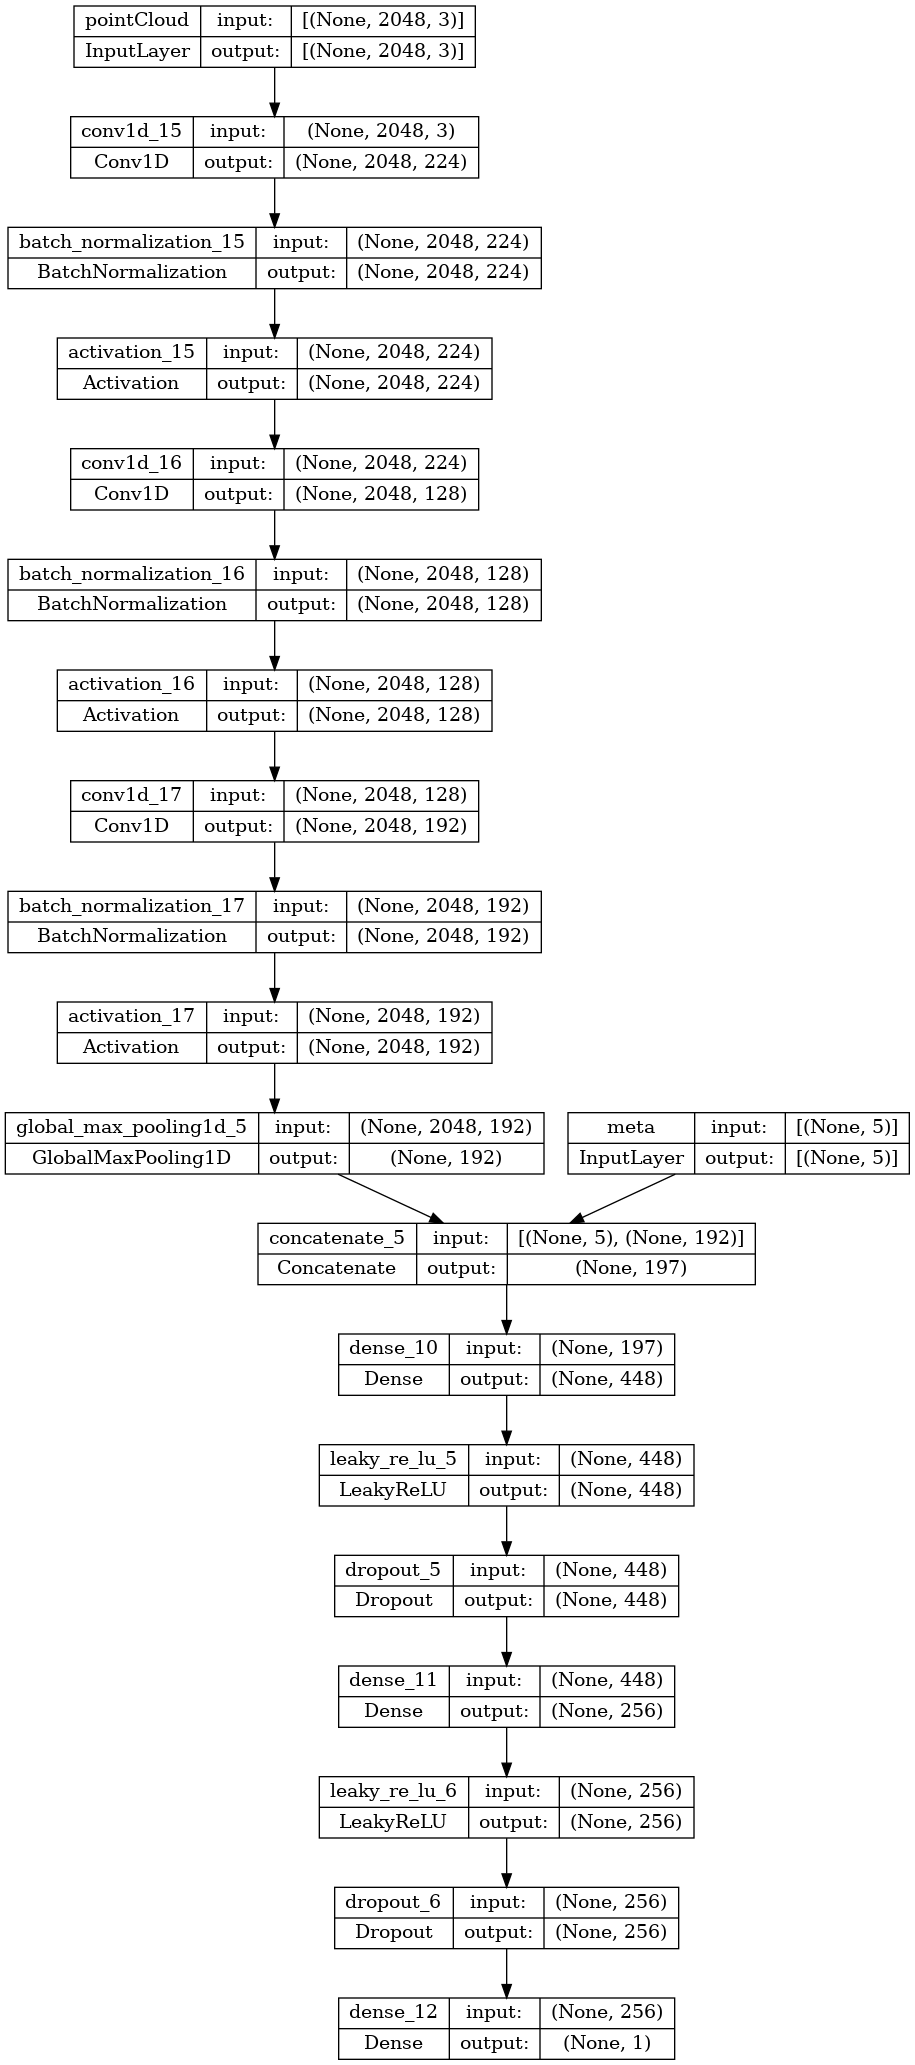

In [325]:
loaded_study = optuna.load_study(study_name='office1_is_test', storage='sqlite:///'+db_path)

best_trial = loaded_study.best_trial
best_model = total_model_builder(best_trial)
keras.utils.plot_model(best_model, show_shapes=True)

In [326]:
import pandas as pd

def plot_history(history:dict, ymax:float=None):
    history_df = pd.DataFrame(history)
    
    loss_df = history_df[["loss", "val_loss"]]
    loss_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("Loss(MSE)")
    if ymax is not None:
        plt.ylim(0., ymax)
    plt.show()

    acc_df = history_df[["mae", "val_mae"]]
    acc_df.plot()
    plt.xlabel("epochs")
    plt.ylabel("MeanAbsoluteError")
    plt.show()

## チューニングの再現

In [331]:
from keras.callbacks import TensorBoard
import datetime

tb_log_dir = "/mnt/MachineLearning/tblogs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print("tb_log_dir = ", tb_log_dir)
# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

"""
チューニング結果を確認するため、改めてチューニング時と同じデータセットで学習
最終テストは行わない
"""
tuning_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    
    val_office_list = [val_office for val_office in test_office_list if val_office != test_office]
    val_office = val_office_list[0]
    train_office_list = [office for office in fit_office_list if office != val_office]
    
    X_dict_train, y_train = get_officeDataset(train_office_list, df_ml, pointCloud_dict, shuffle=True)
    X_dict_val, y_val = get_officeDataset([val_office], df_ml, pointCloud_dict, shuffle=False)
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)
    
    print(best_model.summary())
    
    tuning_history = best_model.fit(
        X_dict_train, y_train,
        validation_data = (X_dict_val, y_val),
        epochs = 200,
        batch_size=loaded_study.best_params["batch_size"],
        callbacks = [
            EarlyStopping(monitor='val_loss', min_delta=0.0, patience=10),
            TensorBoard(log_dir=tb_log_dir+"/"+test_office, histogram_freq=1, write_graph=True)
        ],
        # verbose=False,
    )

    tuning_dict[test_office] = {"best_trial":best_trial, "history":tuning_history}


tb_log_dir =  /mnt/MachineLearning/tblogs/20221221-063247
test_office: office1
Model: "predictionnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 pointCloud (InputLayer)        [(None, 2048, 3)]    0           []                               
                                                                                                  
 conv1d_18 (Conv1D)             (None, 2048, 224)    896         ['pointCloud[0][0]']             
                                                                                                  
 batch_normalization_18 (BatchN  (None, 2048, 224)   896         ['conv1d_18[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activa

In [353]:
tb_log_dir

'/mnt/MachineLearning/tblogs/20221221-063247'

In [354]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [355]:
%tensorboard  --logdir $tb_log_dir

Best trial (test for office1):
  Value: 669.6648010253906
  Params: 
    activation: LeakyReLU
    batch_size: 256
    conv_layers: 3
    dense_layers: 2
    dropout: 0.3
    filters_None-0: 224
    filters_None-1: 128
    filters_None-2: 192
    lr: 3.289682707922679e-05
    units-0: 448
    units-1: 256


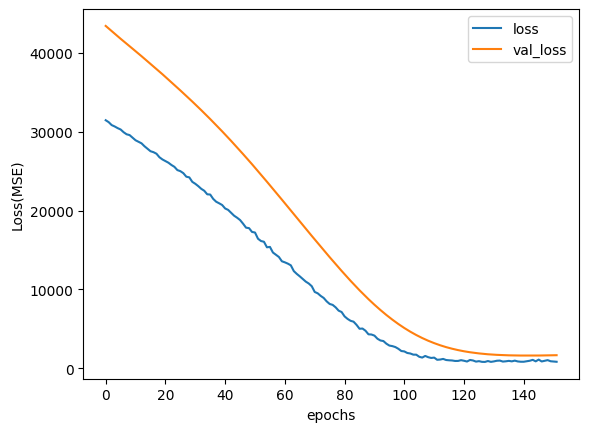

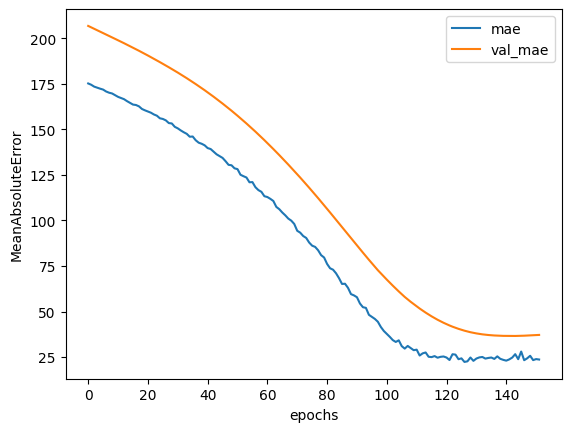

Best trial (test for office2):
  Value: 565.6798583984375
  Params: 
    batch_size: 256
    conv_layers: 2
    dense_layers: 0
    filters_None-0: 224
    filters_None-1: 224
    lr: 0.000398483193859419


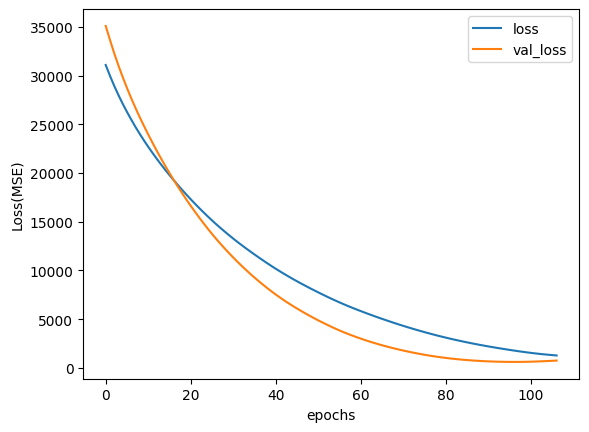

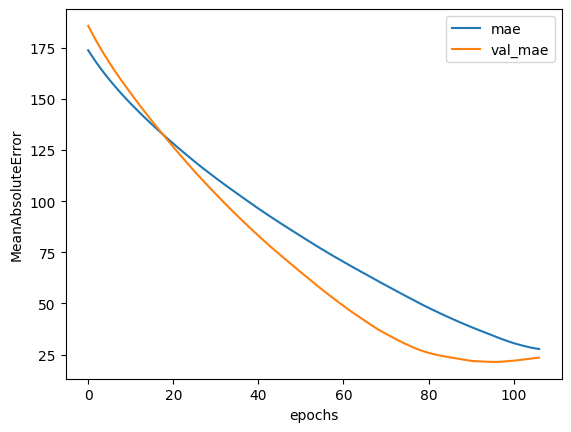

Best trial (test for office3):
  Value: 713.9701507568359
  Params: 
    activation: LeakyReLU
    batch_size: 128
    conv_layers: 1
    dense_layers: 1
    dropout: 0.3
    filters_None-0: 32
    lr: 0.0004244058470088153
    units-0: 384


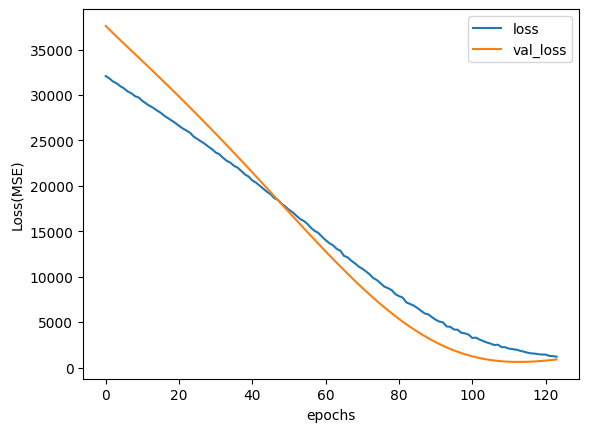

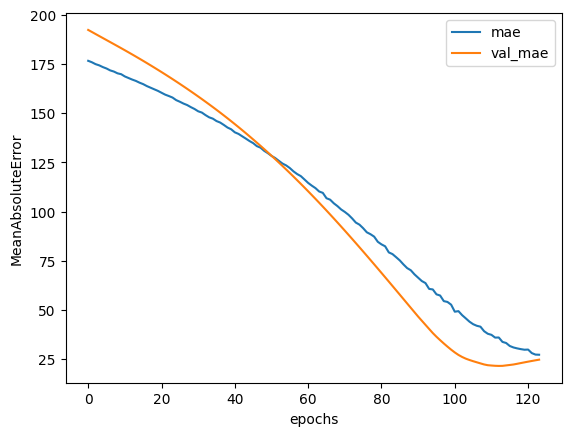

Best trial (test for office4):
  Value: 824.2126525878906
  Params: 
    activation: ReLU
    batch_size: 128
    conv_layers: 1
    dense_layers: 2
    dropout: 0.5
    filters_None-0: 96
    lr: 0.00013132483481858838
    units-0: 320
    units-1: 64


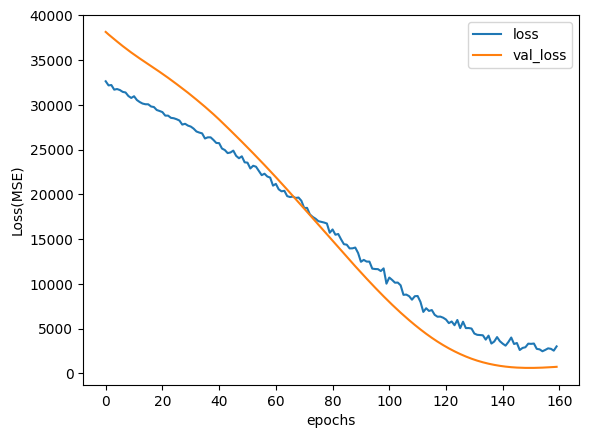

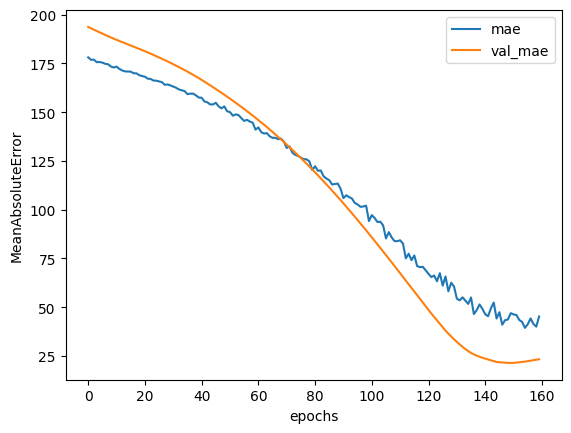

Best trial (test for office5):
  Value: 859.8818054199219
  Params: 
    activation: ELU
    batch_size: 32
    conv_layers: 1
    dense_layers: 1
    dropout: None
    filters_None-0: 256
    lr: 7.733893654961031e-05
    units-0: 448


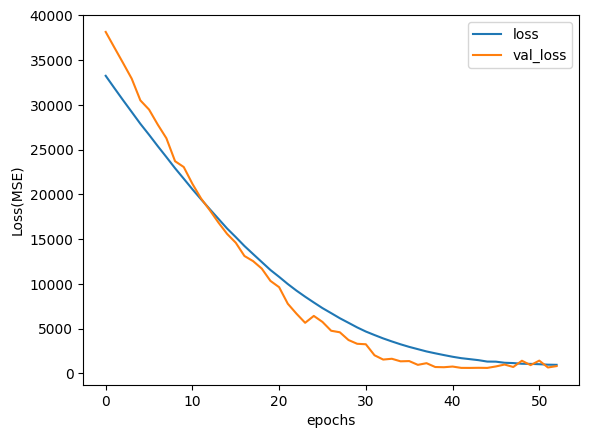

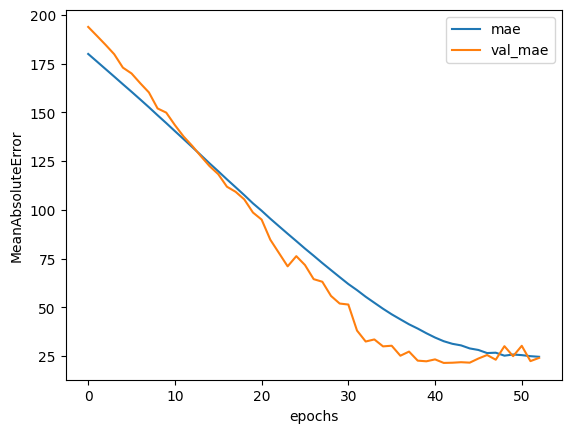

Best trial (test for office6):
  Value: 683.5925750732422
  Params: 
    activation: LeakyReLU
    batch_size: 128
    conv_layers: 1
    dense_layers: 3
    dropout: 0.5
    filters_None-0: 96
    lr: 4.792103265846719e-05
    units-0: 384
    units-1: 448
    units-2: 192


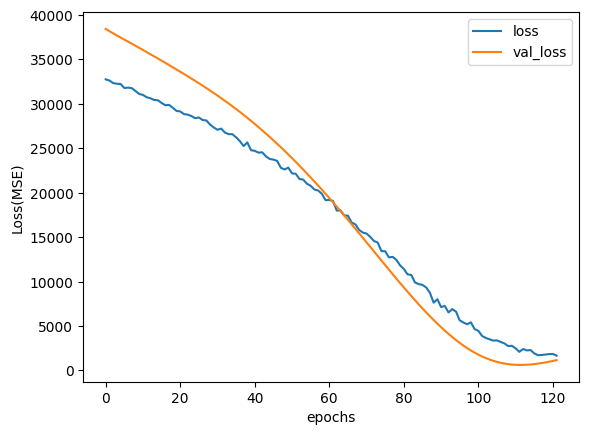

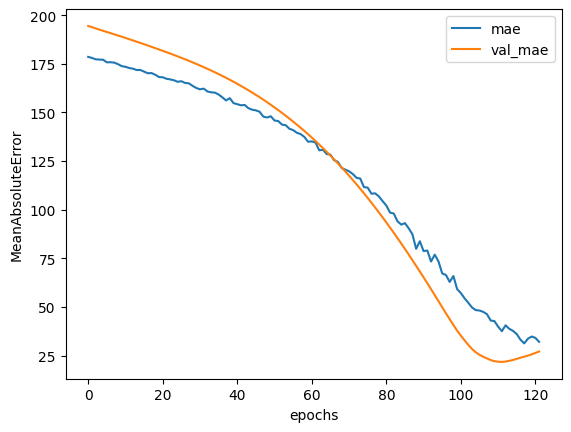

In [335]:
for test_office, result_dict in tuning_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
    plot_history(result_dict["history"].history)

## 最終テスト

In [336]:
"""
最終テスト
チューナーに与えなかったオフィスを使って検証
"""

# db_path = '/mnt/MachineLearning/OptunaLog/optuna_study.db'

test_dict = {}

for test_office in test_office_list:
    print("test_office:", test_office)
    fit_office_list = [office for office in office_list if office != test_office]
    
    X_dict_fit, y_fit = get_officeDataset(fit_office_list, df_ml, pointCloud_dict, shuffle=True)
    X_dict_test, y_test = get_officeDataset([test_office], df_ml, pointCloud_dict, shuffle=False)
    
    study_name = test_office + '_is_test'

    loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

    best_trial = loaded_study.best_trial
    best_model = total_model_builder(best_trial)

    test_history = best_model.fit(
        X_dict_fit, y_fit,
        batch_size = loaded_study.best_params["batch_size"],
        epochs = 200,
        validation_data = (X_dict_test, y_test),
        # callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20)]
    )
    
    test_dict[test_office] = {"best_trial":best_trial, "history":test_history}


test_office: office1
Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 33026.3945 - mae: 179.2634 - val_loss: 37460.8242 - val_mae: 191.9627
Epoch 2/200
1/1 [==============================] - 0s 144ms/step - loss: 32656.3398 - mae: 178.2728 - val_loss: 37082.3828 - val_mae: 190.9747
Epoch 3/200
1/1 [==============================] - 0s 84ms/step - loss: 32523.3672 - mae: 177.8715 - val_loss: 36699.6836 - val_mae: 189.9702
Epoch 4/200
1/1 [==============================] - 0s 85ms/step - loss: 32191.2324 - mae: 177.0160 - val_loss: 36318.2031 - val_mae: 188.9635
Epoch 5/200
1/1 [==============================] - 0s 81ms/step - loss: 31893.7715 - mae: 176.1250 - val_loss: 35943.7891 - val_mae: 187.9703
Epoch 6/200
1/1 [==============================] - 0s 82ms/step - loss: 31642.3184 - mae: 175.3997 - val_loss: 35571.4922 - val_mae: 186.9775
Epoch 7/200
1/1 [==============================] - 0s 83ms/step - loss: 31368.3359 - mae: 174.6447 - val_loss: 35207.0000 - val_

Best trial (test for office1):
  Value: 669.6648010253906
  Params: 
    activation: LeakyReLU
    batch_size: 256
    conv_layers: 3
    dense_layers: 2
    dropout: 0.3
    filters_None-0: 224
    filters_None-1: 128
    filters_None-2: 192
    lr: 3.289682707922679e-05
    units-0: 448
    units-1: 256


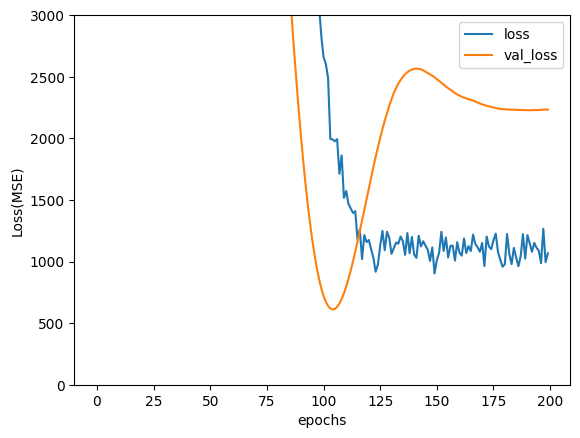

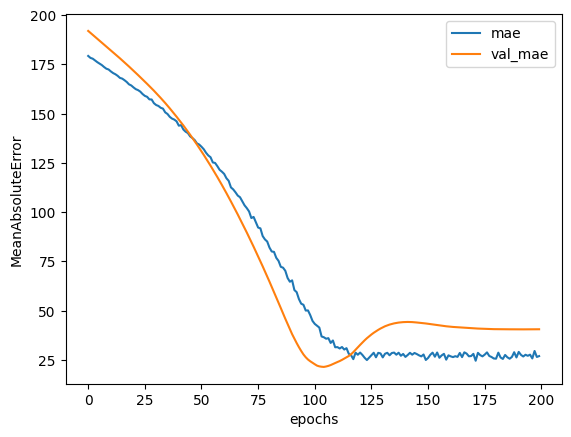

Best trial (test for office2):
  Value: 565.6798583984375
  Params: 
    batch_size: 256
    conv_layers: 2
    dense_layers: 0
    filters_None-0: 224
    filters_None-1: 224
    lr: 0.000398483193859419


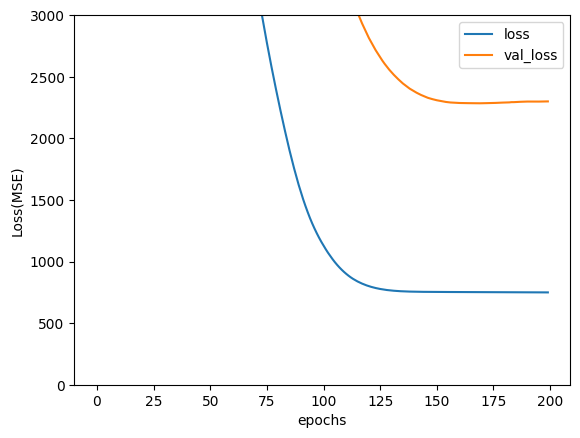

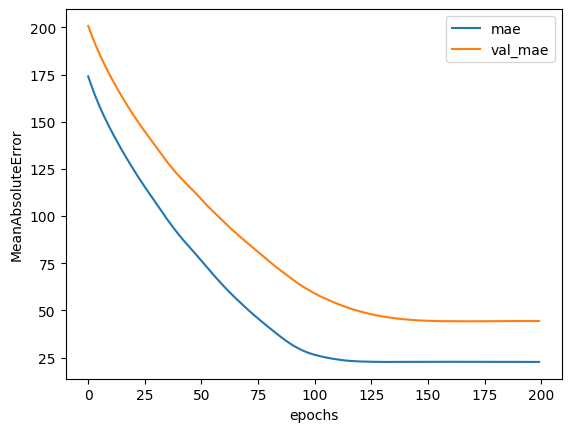

Best trial (test for office3):
  Value: 713.9701507568359
  Params: 
    activation: LeakyReLU
    batch_size: 128
    conv_layers: 1
    dense_layers: 1
    dropout: 0.3
    filters_None-0: 32
    lr: 0.0004244058470088153
    units-0: 384


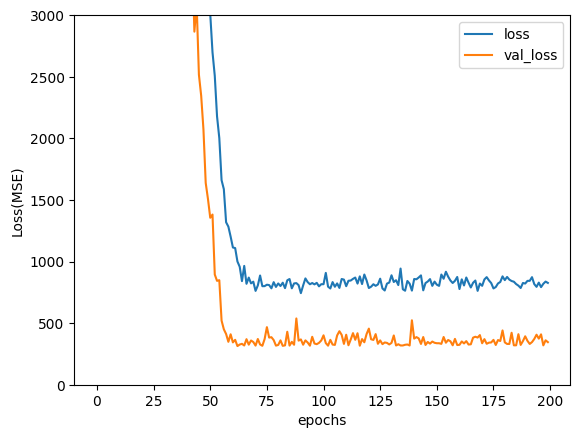

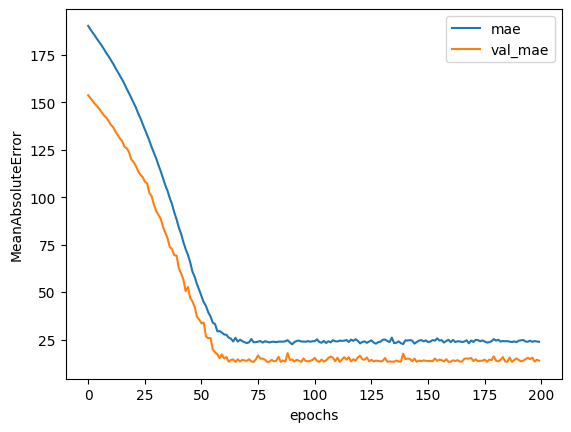

Best trial (test for office4):
  Value: 824.2126525878906
  Params: 
    activation: ReLU
    batch_size: 128
    conv_layers: 1
    dense_layers: 2
    dropout: 0.5
    filters_None-0: 96
    lr: 0.00013132483481858838
    units-0: 320
    units-1: 64


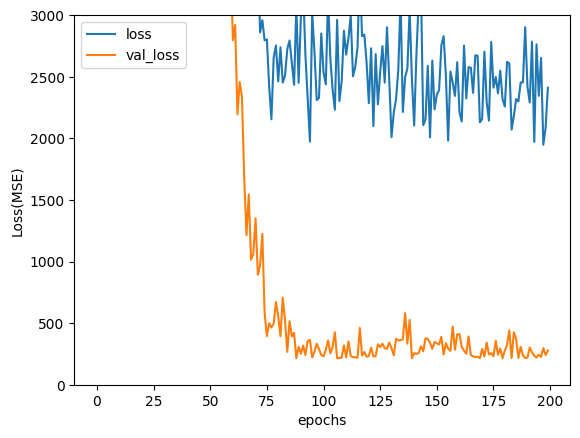

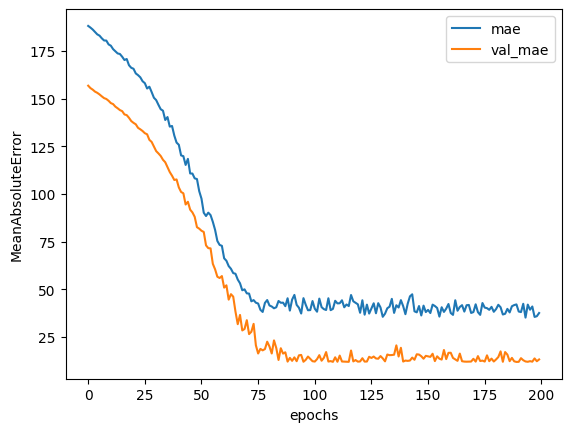

Best trial (test for office5):
  Value: 859.8818054199219
  Params: 
    activation: ELU
    batch_size: 32
    conv_layers: 1
    dense_layers: 1
    dropout: None
    filters_None-0: 256
    lr: 7.733893654961031e-05
    units-0: 448


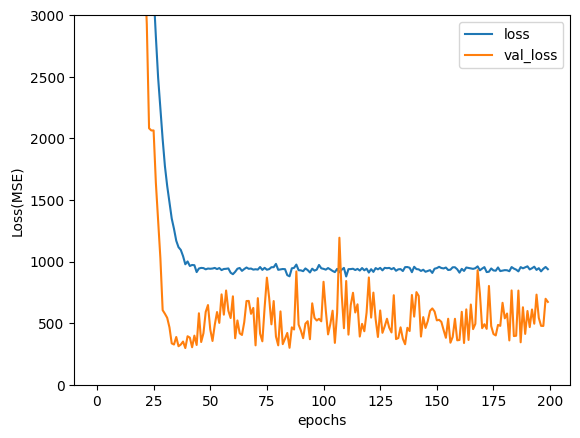

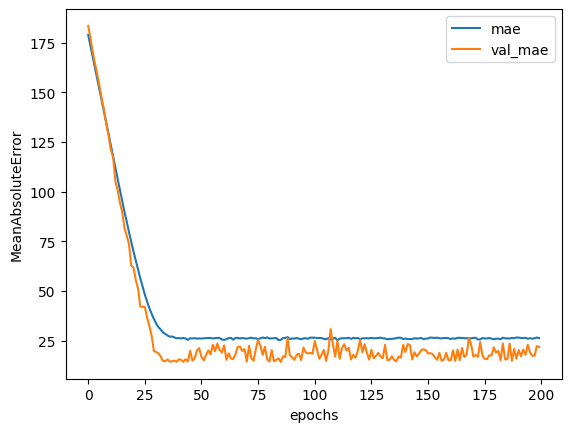

Best trial (test for office6):
  Value: 683.5925750732422
  Params: 
    activation: LeakyReLU
    batch_size: 128
    conv_layers: 1
    dense_layers: 3
    dropout: 0.5
    filters_None-0: 96
    lr: 4.792103265846719e-05
    units-0: 384
    units-1: 448
    units-2: 192


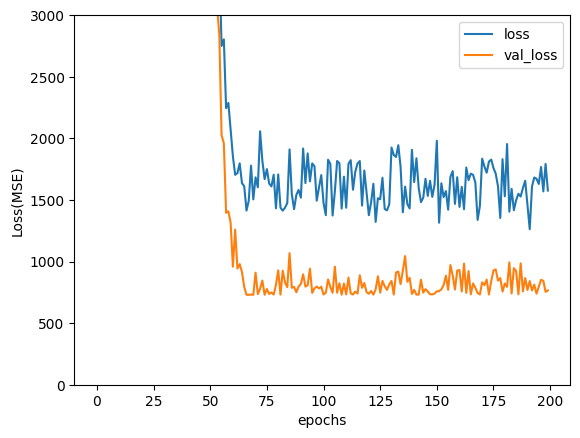

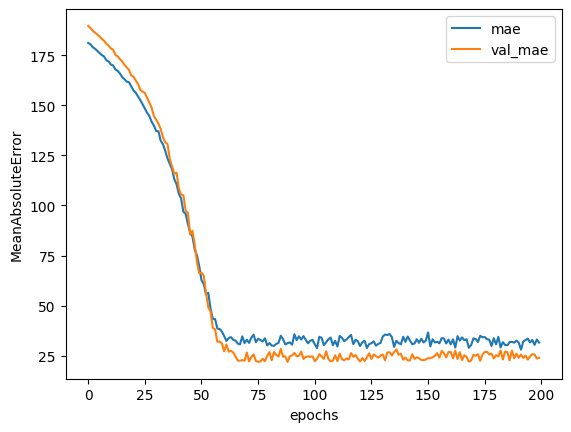

In [338]:
for test_office, result_dict in test_dict.items():
    print(f"Best trial (test for {test_office}):")
    best_trial = result_dict["best_trial"]

    print("  Value: {}".format(best_trial.value))

    print("  Params: ")
    for key, value in best_trial.params.items():
        print("    {}: {}".format(key, value))
        
        
    plot_history(result_dict["history"].history, ymax=3000.)

test_office: office1
Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 33357.4766 - mae: 180.1774 - val_loss: 38364.9023 - val_mae: 194.3103
Epoch 2/200
1/1 [==============================] - 0s 86ms/step - loss: 33108.2656 - mae: 179.4934 - val_loss: 37948.8945 - val_mae: 193.2367
Epoch 3/200
1/1 [==============================] - 0s 87ms/step - loss: 32969.9219 - mae: 179.1478 - val_loss: 37532.8594 - val_mae: 192.1571
Epoch 4/200
1/1 [==============================] - 0s 84ms/step - loss: 32506.9570 - mae: 177.8379 - val_loss: 37124.1875 - val_mae: 191.0909
Epoch 5/200
1/1 [==============================] - 0s 92ms/step - loss: 32106.1855 - mae: 176.6523 - val_loss: 36715.9023 - val_mae: 190.0200
Epoch 6/200
1/1 [==============================] - 0s 89ms/step - loss: 31971.9102 - mae: 176.2207 - val_loss: 36316.8320 - val_mae: 188.9673
Epoch 7/200
1/1 [==============================] - 0s 88ms/step - loss: 31736.9785 - mae: 175.5939 - val_loss: 35912.3750 - val_m

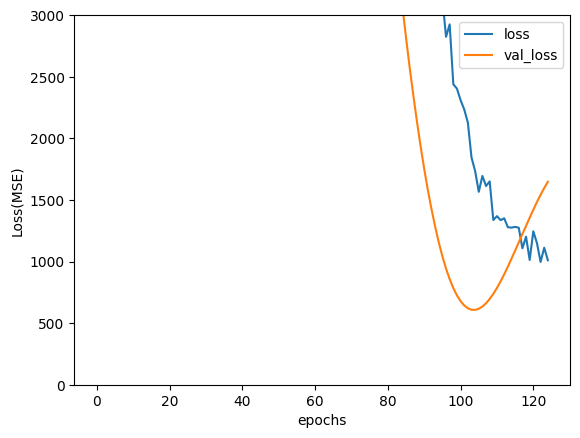

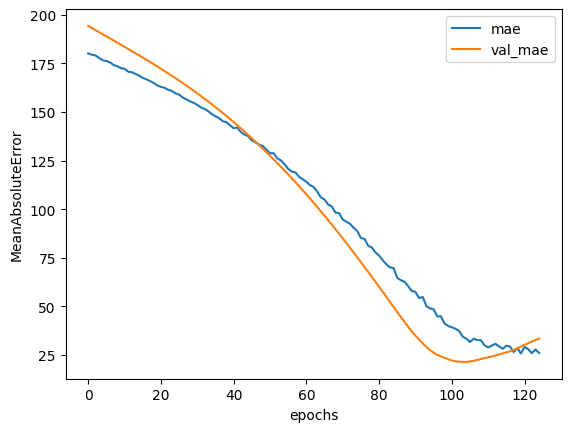

In [373]:
"""
最終テスト
only office1
"""

test_office="office1"

print("test_office:", test_office)
fit_office_list = [office for office in office_list if office != test_office]
    
X_dict_fit, y_fit = get_officeDataset(fit_office_list, df_ml, pointCloud_dict, shuffle=True)
X_dict_test, y_test = get_officeDataset([test_office], df_ml, pointCloud_dict, shuffle=False)

study_name = test_office + '_is_test'

loaded_study = optuna.load_study(study_name=study_name, storage='sqlite:///'+db_path)

best_trial = loaded_study.best_trial
best_model = total_model_builder(best_trial)

test_history = best_model.fit(
    X_dict_fit, y_fit,
    batch_size = loaded_study.best_params["batch_size"],
    epochs = 200,
    validation_data = (X_dict_test, y_test),
    callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0, patience=20, restore_best_weights=True,)]
)

print("  Value: {}".format(best_trial.value))

print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

plot_history(test_history.history, ymax=3000.)

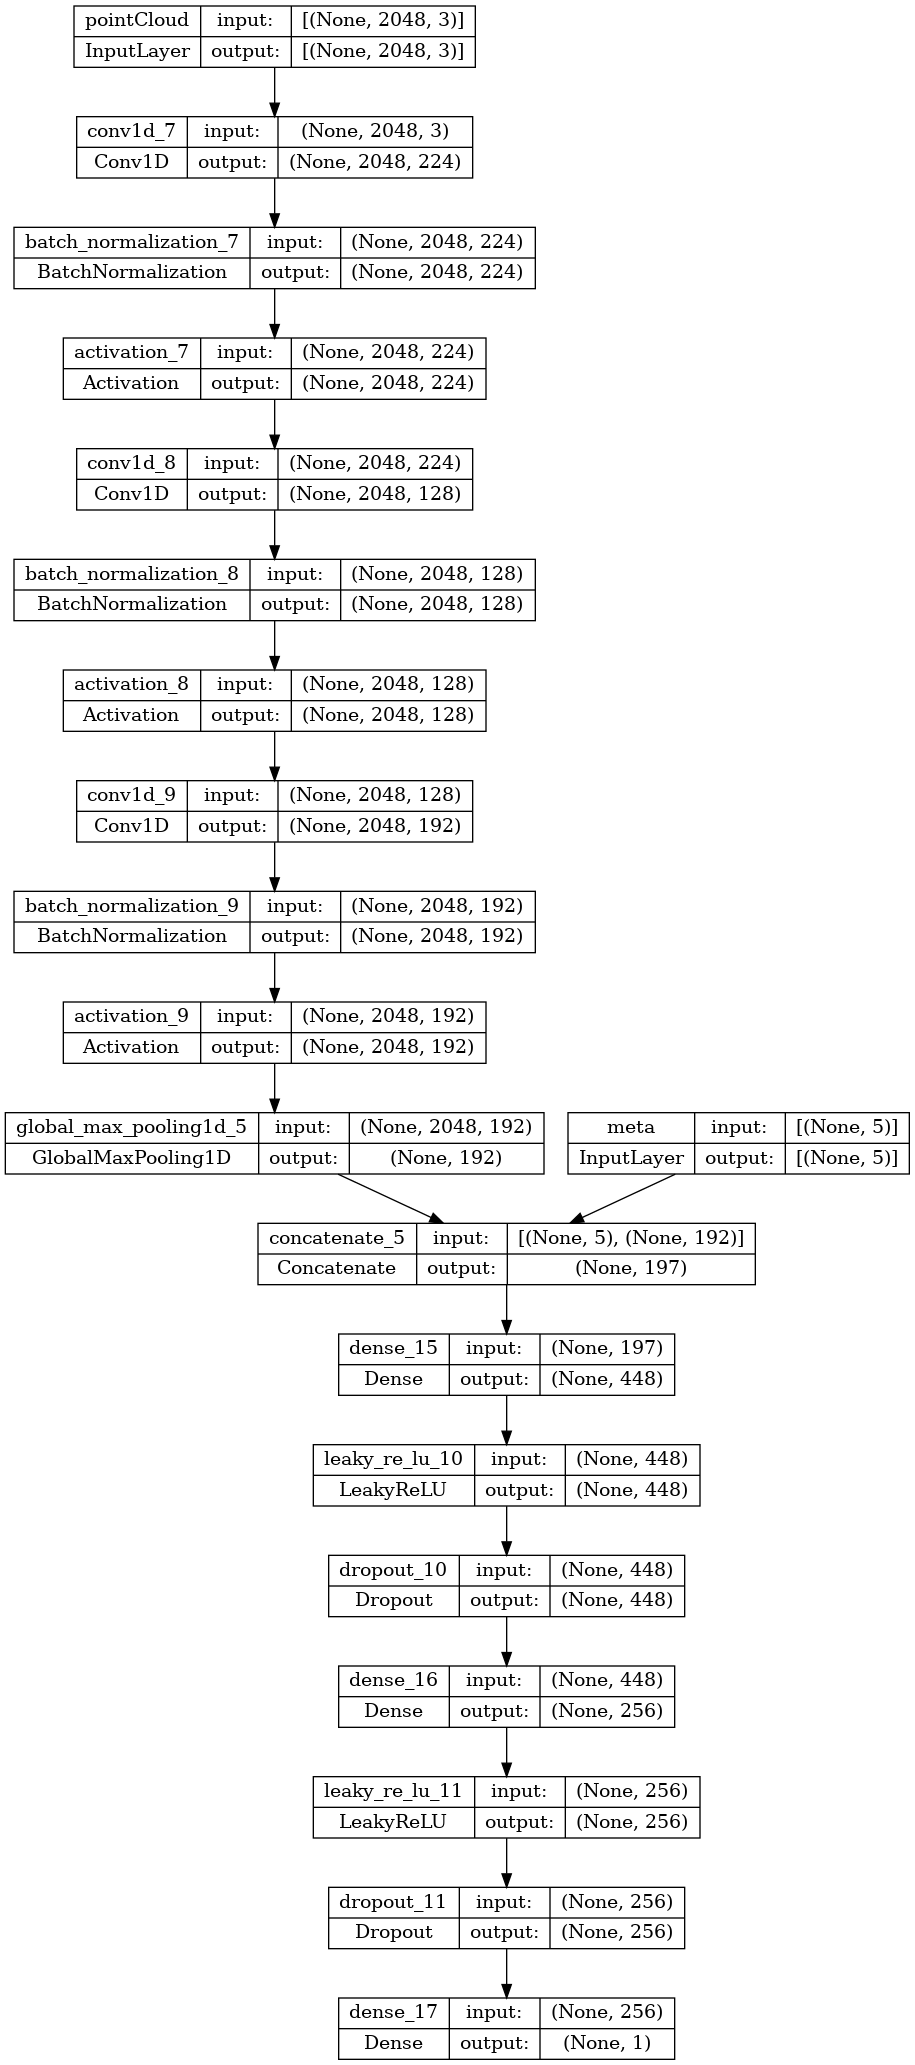

In [374]:
keras.utils.plot_model(best_model, show_shapes=True)

In [416]:
def get_layer_byName(model, name:str):
    for layer in model.layers:
        if layer.name == name:
            return layer
        
    return

In [409]:
loaded_study = optuna.load_study(study_name="office1_is_test", storage='sqlite:///'+db_path)
best_trial = loaded_study.best_trial
best_model_beforeFitting = total_model_builder(best_trial)

In [428]:
# layer = get_layer_byName(best_model_beforeFitting, "dense_17")
layer = best_model_beforeFitting.layers[-7]
print(layer.name)
a = layer.get_weights()[0][:5,:]
b = layer.get_weights()[0][5:,:]

b

dense_18


array([[-0.07754661, -0.07333098,  0.02086405, ...,  0.05747446,
         0.07491491,  0.01799636],
       [ 0.0771404 ,  0.08855509, -0.09320947, ..., -0.02384954,
         0.01260802, -0.09439144],
       [ 0.06604787, -0.06989998, -0.03855198, ..., -0.03520782,
        -0.0087788 ,  0.05926427],
       ...,
       [ 0.08936381, -0.04566927, -0.06682874, ...,  0.05946132,
        -0.04955296,  0.02682418],
       [ 0.09560459, -0.03197885,  0.03594158, ...,  0.00631895,
        -0.07409042, -0.01077101],
       [-0.02010366,  0.06466053,  0.06877256, ..., -0.01796207,
         0.0561362 , -0.05919041]], dtype=float32)

In [427]:
# layer = get_layer_byName(best_model, "dense_17")
layer = best_model.layers[-7]
print(layer.name)
a = layer.get_weights()[0][:5,:]
b = layer.get_weights()[0][5:,:]

b

dense_15


array([[ 0.03100905, -0.02652591, -0.08065316, ..., -0.00555864,
        -0.04091438,  0.07861751],
       [-0.08702162,  0.04156449, -0.00512968, ..., -0.01846617,
         0.05726961, -0.06275359],
       [ 0.06566633,  0.09173965,  0.00292577, ..., -0.08888558,
         0.06125953,  0.02025105],
       ...,
       [-0.07683584, -0.0298228 ,  0.08881885, ...,  0.04772748,
        -0.00374324,  0.05550094],
       [ 0.03899794, -0.04194074, -0.09174318, ..., -0.00630832,
        -0.08859103,  0.05461465],
       [ 0.08252607,  0.05828649,  0.05854718, ...,  0.08223946,
         0.01022666,  0.08963186]], dtype=float32)

In [387]:
for layer in best_model.layers:
    print(layer.name)

pointCloud
conv1d_7
batch_normalization_7
activation_7
conv1d_8
batch_normalization_8
activation_8
conv1d_9
batch_normalization_9
activation_9
meta
global_max_pooling1d_5
concatenate_5
dense_15
leaky_re_lu_10
dropout_10
dense_16
leaky_re_lu_11
dropout_11
dense_17


In [393]:
output_layer = best_model.layers[-1]
weights = output_layer.get_weights()[0]
weights

array([[-0.07070713],
       [-0.11494861],
       [ 0.13467824],
       [-0.0972449 ],
       [ 0.08559727],
       [-0.06844454],
       [ 0.0357789 ],
       [ 0.09654224],
       [-0.13364835],
       [-0.04813058],
       [ 0.00369875],
       [-0.10700696],
       [ 0.05109425],
       [ 0.01146108],
       [ 0.01486224],
       [-0.06183353],
       [-0.04520018],
       [-0.00390749],
       [ 0.03100433],
       [ 0.04331222],
       [ 0.08547328],
       [-0.10604007],
       [-0.1129664 ],
       [-0.0947857 ],
       [-0.08919045],
       [-0.07012212],
       [-0.06051648],
       [-0.10394968],
       [-0.14437476],
       [ 0.11259253],
       [ 0.02530732],
       [ 0.14521906],
       [ 0.12170827],
       [ 0.03013774],
       [-0.11895351],
       [ 0.12457369],
       [-0.10657597],
       [-0.13499041],
       [ 0.06466299],
       [ 0.13483591],
       [ 0.11094439],
       [-0.02454396],
       [-0.08029903],
       [-0.05578565],
       [-0.03525013],
       [ 0

In [375]:
y_fit_pred = best_model.predict(X_dict_fit)
y_test_pred = best_model.predict(X_dict_test)

2/2 [==============================] - 0s 4ms/step


In [376]:
y_test_pred

array([[196.41357],
       [196.25621],
       [196.43257],
       [196.24275],
       [196.40596],
       [196.22133],
       [196.38606],
       [196.20792],
       [196.37053],
       [196.29292],
       [196.46028],
       [196.28102],
       [196.44511],
       [196.22923],
       [196.08305],
       [196.24553],
       [196.06831],
       [196.23112],
       [196.04549],
       [196.21495],
       [196.0298 ],
       [196.19725],
       [196.11607],
       [196.27458],
       [196.10202],
       [196.25978],
       [196.15007],
       [195.99504],
       [196.16028],
       [195.9824 ],
       [196.1393 ],
       [195.96864],
       [196.129  ],
       [195.94888],
       [196.11168],
       [196.03651],
       [196.19717],
       [196.01999],
       [196.18011]], dtype=float32)

In [377]:
pd.DataFrame({"y_test":y_test.values, "y_test_pred":y_test_pred.flatten()})

,y_test,y_test_pred
0,222.339394,196.413574
1,218.400000,196.256210
2,201.296970,196.432571
3,219.690909,196.242752
4,222.060606,196.405960
5,236.660606,196.221329
6,221.406061,196.386063
7,220.690909,196.207916
8,211.993939,196.370529
9,226.787879,196.292923


In [378]:
X_dict_fit

{'meta':                         aircon  ventilation  exhaust_a  exhaust_b  exhaust_off
 case_name                                                                     
 office3_660_246_aout  0.446455     1.265523   1.147695  -0.871311    -0.398249
 office4_0_246_aout   -1.384552     1.265523   1.147695  -0.871311    -0.398249
 office2_360_0        -0.385821    -1.666952  -0.871311  -0.871311     2.510993
 office3_960_164_aout  1.278731     0.288031   1.147695  -0.871311    -0.398249
 office5_360_164_aout -0.385821     0.288031   1.147695  -0.871311    -0.398249
 ...                        ...          ...        ...        ...          ...
 office2_360_164_bout -0.385821     0.288031  -0.871311   1.147695    -0.398249
 office5_660_82_aout   0.446455    -0.689460   1.147695  -0.871311    -0.398249
 office4_360_246_bout -0.385821     1.265523  -0.871311   1.147695    -0.398249
 office6_0_82_aout    -1.384552    -0.689460   1.147695  -0.871311    -0.398249
 office3_660_82_aout   0.446455 

In [379]:
def show_office_residual_plot(train_x, train_y, test_x, test_y, office_array, figsize=[10, 8]):
    xlim = [min(min(train_x), min(test_x))-5, max(max(train_x), max(test_x))+5]
    fig= plt.figure(figsize=figsize)

    plt.figure(figsize=[10, 8])

    #カラーマップ等の準備
    markers = ("s", "x", "o", "^", "v", "<", ">", "1", "2", "3", "4", "8")
    colors = ("red", "blue", "limegreen", "gray", "cyan", "black", "purple", "green",
              "orange", "yellow", "crimson", "goldenrod", "orchid", "khaki", "darkgray")

    idx = 0
    for target_office_name in np.unique(office_list):
        if target_office_name == "office1":
            continue
            
        target_office_index = [i for i in range(len(office_array)) if target_office_name+"_" in office_array[i]]
        print(target_office_name, len(target_office_index))
        
        plt.scatter(train_x[target_office_index], train_y[target_office_index], 
                    s=80, c=colors[idx], marker=markers[2], edgecolor="white", label="Training:"+target_office_name)
        
        idx+=1
        
    plt.scatter(test_x, test_y, s=80, c="steelblue", marker="x", edgecolor="white", label="Test data")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.legend(loc="best")
    plt.hlines(y=0, xmin=xlim[0], xmax=xlim[1], color="black", lw=2)
    plt.xlim(xlim)
    plt.tight_layout()
    plt.show()

In [380]:
y_fit.to_numpy().shape

(140,)

In [381]:
X_dict_fit["meta"].index

Index(['office3_660_246_aout', 'office4_0_246_aout', 'office2_360_0',
       'office3_960_164_aout', 'office5_360_164_aout', 'office2_960_82_bout',
       'office6_660_82_aout', 'office6_960_246_bout', 'office6_360_246_aout',
       'office2_360_164_aout',
       ...
       'office5_0_246_bout', 'office4_660_0', 'office5_0_246_aout',
       'office3_360_164_aout', 'office2_960_0', 'office2_360_164_bout',
       'office5_660_82_aout', 'office4_360_246_bout', 'office6_0_82_aout',
       'office3_660_82_aout'],
      dtype='object', name='case_name', length=140)

office2 28
office3 28
office4 28
office5 28
office6 28


/tmp/ipykernel_745275/219637474.py:25: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(test_x, test_y, s=80, c="steelblue", marker="x", edgecolor="white", label="Test data")


<Figure size 1000x800 with 0 Axes>

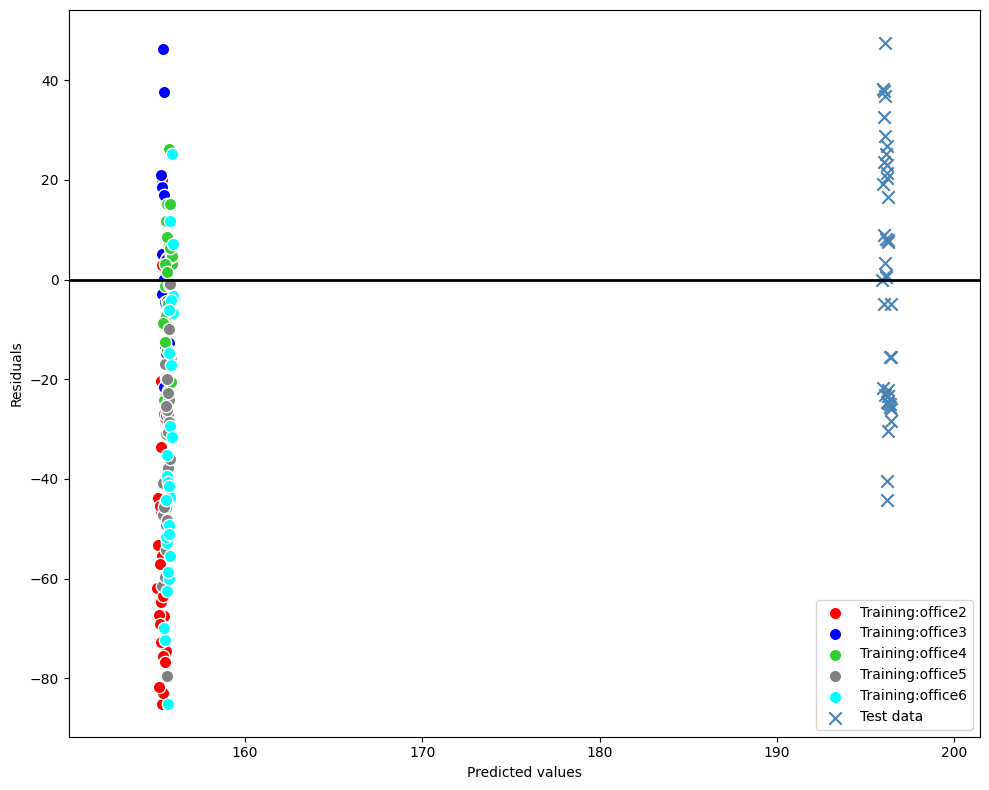

In [382]:
# #正規表現で書いており、.extractはパターンにマッチした最初の文字列のみを抜き出す。office+0-9までの数字1桁または2桁を探索
# office_array = X_index.str.extract("(office+[0-9]{1,2})").to_numpy()

#残差プロット
show_office_residual_plot(train_x=y_fit_pred, train_y=y_fit_pred - y_fit.to_numpy().reshape((-1,1)), 
                            test_x=y_test_pred, test_y=y_test_pred - y_test.to_numpy().reshape((-1,1)), 
                            office_array=X_dict_fit["meta"].index
                                  )

In [133]:
X_dict_fit

{'meta': array([[-1.38455178,  1.2655225 , -0.87131147,  1.14769521, -0.39824886],
        [ 1.27873108,  1.2655225 ,  1.14769521, -0.87131147, -0.39824886],
        [-1.38455178,  1.2655225 ,  1.14769521, -0.87131147, -0.39824886],
        ...,
        [ 0.44645519,  1.2655225 , -0.87131147,  1.14769521, -0.39824886],
        [ 1.27873108, -0.68946029, -0.87131147,  1.14769521, -0.39824886],
        [ 0.44645519, -1.66695169, -0.87131147, -0.87131147,  2.51099278]]),
 'pointCloud_aircon': array([[[ 1.3765091 , -2.0106473 , -0.52029866],
         [ 1.3765091 , -1.8412895 , -0.52029866],
         [ 1.3765091 , -1.7396748 , -0.52029866],
         ...,
         [ 2.7313716 , -0.92675734, -0.52029866],
         [ 2.7313716 , -0.8251426 , -0.52029866],
         [ 2.7313716 , -0.6557848 , -0.52029866]],
 
        [[-0.6557848 , -0.99450046, -0.52029866],
         [-0.6557848 , -0.8251426 , -0.52029866],
         [-0.6557848 , -0.72352785, -0.52029866],
         ...,
         [ 0.6990778 ,  0

In [137]:
import gc
 
gc.collect()

38460

In [136]:
from keras.backend import clear_session

# Clear clutter from previous Keras session graphs.
clear_session()